In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import datetime as dt
import warnings
import statsmodels.api as sm
import pylab as py
import numpy as np
warnings.filterwarnings('ignore')

## The Company: King's Lodging Group

**'Bangkok' Initiative**

Kami dari Data Analyst PT. King Stone ingin membantu "King's Lodging Group" yang merupakan anak perusahaan PT. King Stone, untuk membuka cabang atau listing di Bangkok, Thailand. Berikut kami akan melakukan analysis untuk membantu launching lodgement group ke market Bangkok, Thailand. Inisiasi ini kami namakan 'Bangkok' Initiative, dan menggunakan data frame AirBnB Listings Bangkok yang di mana seperti namanya adalah kumpulan data lodging services yang berada di platform AirBnB. Dengan kombinasi Exploratory Data Analysis (EDA) dan statistics test, harapan kami analysis ini dapat membantu management King's Lodging Group dalam planning untuk memasuki market di Bangkok. Bagian dari company overview ini berupa: 
- The product/Business
- Strengths & Limitations
- Market Overview (Bangkok, Thailand)
- Problem Statement
- Vision & Mission

**Company Overview**

**`The Product/Business`**: King's Lodging Group yang berawal dari nama 'Pandega Sari' berdomisili awal di Yogyakarta dan student oriented di karenakan market pada daerah itu yang mayoritas mahasiswa/siswi, yang pada umumnya long-term oriented dalam menyewakan unit/space. Setelah merubah nama menjadi 'King's Lodging Group' group lodging ini memperluas reachnya kepada tourist yang lebih short-term oriented. Sampai sekarang setelah menjadi lodging house ternama di kepulauan Jawa yang memiliki lebih dari 10 unit/space, telah menerapkan hybrid rental model yang berfokus antara long and short term lodging di mana sangat bergantung kepada market space nya.  

**`Strengths`**: Fondasi business model yang sangat kuat di mana bisa menyesuaikan situasi market dengan pendekatan yang optimal dan cost effective. Dengan platform AirBnB memudahkan kita untuk proses administratif penyewaan yang seharusnya di halangi oleh barrier bahasa.  

**`Limitations`**: Budget yang sangat terbatas dalam pelaksanaan 'Bangkok Initiative', dikarenakan tindakan expansi yang sangat beresiko dengan situasi market yang sangat berbeda dan menantang. Maka di butuhkan analysis yang mendalam dan detail.

**`Market Overview (Bangkok, Thailand)`**: Secara umum, saat ini di Bangkok ada lebih dari 15000 listing/space yang tersedia di platform AirBnB dan 0% dari listing tersebut memiliki short-term licenses, di mana ini menunjukkan short-term stay tidak begitu ketat buat para host. Sebaliknya long-term stay kebanyakan di kuasai oleh badan pemerintahan lokal untuk tujuan non-profit. Sekitar 88.93% adalah pengunjung international dimana pengunjung China merupakan group terbesar. Karena ini management dari PT. King Stone ingin melakukan expansi di Bangkok dan tentunya dengan kondisi market yang sangat competitive. 

Source(s): (https://airbtics.com/airbnb-rules-in-bangkok-thailand/)

**`Problem Statement`**

'Review dari pelanggan adalah salah satu tools essential di bidang service seperti Airbnb yang menimbulkan sebuah pertanyaan, attribute apa saja yang memiliki signifikan penting dalam memikat para pelanggan Airbnb untuk meninggalkan review pasca menginap di listing yang bersangkutan?'

**`Vision`**
- Secara konsisten berada di tampilan depan dalam filter search 'Bangkok, Thailand'.
- Menghasilkan review score tidak kurang dari 4.8 di platform AirBnB.
- Berada dalam seleksi repertoar warga Indonesia yang sedang berkunjung ke Thailand.
- Mendapatkan status 'Fully Booked' dalam waktu peak season.  

**`Mission`**
- Melakukan EDA analysis yang detail dan terpercaya untuk kelancaran launching bisnis di Bangkok. 
- Mendapatkan short-term lisensi sewa yang resmi dari pemerintah Thailand. 
- Membentuk hubungan yang baik dengan warga lokal di lokasi tempat beroperasi. 
- Merespon dengan cepat atas comment dan review pelanggan.

**Berikut adalah ciri-ciri dari listing/space Airbnb di Bangkok:** 

`id` = identifier unik dari listing Airbnb

`name` = nama dari listing (Beracak mulai dari nama listing sampai juga dengan karakteristik property)

`host_id` = id unique dari host

`host_name` = nama dari host

`neighbourhood` = nama dari region/wilayah dari domisili central Bangkok dan sekitarnya

`latitude` = informasi koordinat lokasi listing dalam peta

`longitude` = informasi koordinat lokasi listing dalam peta

`room_type` = tipe ruangan/gedung dari listing (Entire home/apt, private room, hotel room, shared room)

`price` = harga dari tiap listing

`minimum_nights` = jumlah minimum pelanggan/pengunjung dapat bermalam untuk membooking listing

`number_of_reviews` = total jumlah reviews yang dimiliki tiap listing 

`last_review` = tanggal di mana listing mendapat reviews yang terkini

`reviews_per_month` = rate review yang masuk dalam tiap listing perbulan

`calculated_host_listings_count` = jumlah listing yang di miliki oleh tiap host

`availability_365` = ketersediaan booking dari listing x hari kedepan

`number_of_reviews_ltm` = jumlah review yang di miliki oleh tiap listing dari 12 bulan terakhir


In [2]:
df_bangkok = pd.read_csv("Airbnb Listings Bangkok.csv")
df_bangkok.head()

Unnamed: 0      id                                            name  \
0           0   27934                 Nice room with superb city view   
1           1   27979                  Easy going landlord,easy place   
2           2   28745               modern-style apartment in Bangkok   
3           3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4  941865                      Suite Room 3 at MetroPoint   

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy       Bang Na  13.66818  100.61674     Private room   
2   123784  Familyroom     Bang Kapi  13.75232  100.62402     Private room   
3   153730     Sirilak     Din Daeng  13.78823  100.57256     Private room   
4   610315       Kasem     Bang Kapi  13.76872  100.63338     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905               3                 65  2020-01-06               0.50   
1   1316               1                  0         NaN                NaN   
2    800              60                  0         NaN                NaN   
3   1286               7                  2  2022-04-01               0.03   
4   1905               1                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0

In [3]:
df_bangkok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [4]:
unique_host_name = df_bangkok['host_name'].nunique()

print("Number of unique values in column 'host_name':", unique_host_name)

Number of unique values in column 'host_name': 5312


In [5]:
host_reviews0 = df_bangkok['host_name'].value_counts().head(3)
print(host_reviews0)

host_name
Curry    228
Noons     99
K         91
Name: count, dtype: int64


## Analysis 1: Investigating Null Values

In [6]:
null_count = df_bangkok.isnull().sum()
print(null_count)

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64


- Untuk optimasi null dari data frame airBnb listing bangkok, perlu di selidiki lebih awal null value sebanyak 5790 dari variable last_review dan review_per_month. Investigasi ini berfokus dalam variable/column `host_id` & `host_name`, di mana investigasi null value ini di lakukan untuk mencari apakah adanya hubungan atau pattern, yang menyebabkan terjadinya Null values tersebut berdasarkan attribut dalam listing tersebut. Walawpun inti dari problem statement kami berfokus kepada listing yang memiliki review, memahami konteks dari listing yang tidak memiliki review tersebut mungkin dapat menjadi salah satu usulan dalam strategi memasuki market airbnb di Bangkok.  

(Note: HASIL DARI INVESTIGASI INI BERKEMUNGKINAN MEMILIKI SIFAT DINAMIS SEIRING ANALYSIS SECARA KESELURUHAN BERJALAN) 

Variable: 'host_id' & 'host_name'

In [7]:
df_bangkok[df_bangkok['last_review'].isna()]['host_id'].value_counts()

host_id
228535635    56
434168399    34
44305808     33
186270866    28
68154488     26
             ..
213263577     1
210873200     1
213272886     1
207413025     1
94899359      1
Name: count, Length: 3610, dtype: int64

Pengecekan host_id 

In [8]:
df_bangkok[df_bangkok['host_id']==434168399]['host_name'].value_counts().head

<bound method NDFrame.head of host_name
Krittika    44
Name: count, dtype: int64>

In [9]:
df_bangkok[df_bangkok['last_review'].isna()]['host_name'].value_counts()

host_name
Pornchai        57
Zuzu            38
Krittika        34
Lek Boonsiri    33
Elmer           28
                ..
Hilda            1
Sea              1
Ives             1
Alcott           1
Renee            1
Name: count, Length: 3121, dtype: int64

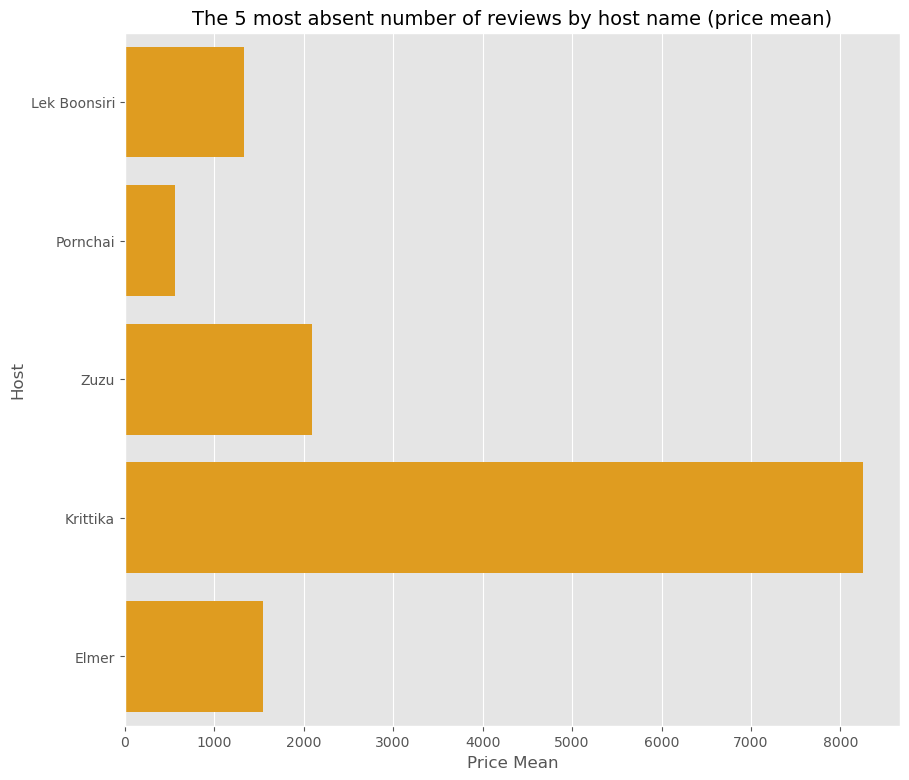

In [36]:
host_of_interest0 = ['Pornchai', 'Zuzu', 'Krittika', 'Lek Boonsiri', 'Elmer']  
df_filtered0 = df_bangkok[df_bangkok['host_name'].isin(host_of_interest0)]

# Create plot
plt.figure(figsize=(10, 9))
sns.barplot(data=df_filtered0, x='price', y='host_name', estimator='mean', errorbar=None, color='orange')
plt.title('The 5 most absent number of reviews by host name (price mean)', size=14)
plt.xlabel('Price Mean')
plt.ylabel('Host')
plt.show()


Contoh Listing host name Krittika & Pornchai

In [11]:
krittika = df_bangkok[df_bangkok['host_name'] == 'Krittika']
krittika.head()

Unnamed: 0                  id  \
14034       14034  714058272854834244   
14050       14050  714836482202458368   
14060       14060  715565949199588020   
14061       14061  715566597622561214   
14172       14172  722039727977197287   

                                                    name    host_id host_name  \
14034  Lovely 2 bedrooms Flat 55 sqm w/pool Good Loca...  434168399  Krittika   
14050  Lovely 2 bedrooms Flat 55 sqm w/pool Good Loca...  434168399  Krittika   
14060      Lovely Studio room with pool - great location  434168399  Krittika   
14061  Lovely 2 bedrooms Flat 65 sqm w/pool Good Loca...  434168399  Krittika   
14172             Sukhumvit 71 - Modern 2 Bedrooms Suite  434168399  Krittika   

      neighbourhood   latitude   longitude        room_type  price  \
14034   Khlong Toei  13.725982  100.562029  Entire home/apt   2950   
14050   Khlong Toei  13.727120  100.561270  Entire home/apt   2850   
14060   Khlong Toei  13.726930  100.562590  Entire home/apt   1950   
14061   Khlong Toei  13.726200  100.563230  Entire home/apt   3150   
14172       Vadhana  13.738040  100.597040  Entire home/apt  12714   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
14034               1                  0         NaN                NaN   
14050               1                  1  2022-12-04               1.00   
14060               1                  0         NaN                NaN   
14061               1                  0         NaN                NaN   
14172               1                  2  2022-12-12               0.91   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
14034                              44               360                      0  
14050                              44               302                      1  
14060                              44               359                      0  
14061                              44               302                      0  
14172                              44               365                      2

In [12]:
pornchai = df_bangkok[df_bangkok['host_name'] == 'Pornchai']
pornchai.head()

Unnamed: 0        id                                         name  \
6391        6391  30438592  Phranakhon  Hostel ( 8 Male Dormitory Room)   
6393        6393  30448370   Phranakhon Hostel (14 Male Dormitory Room)   
6432        6432  30719993  Phranakhon Hostel (8  Lady  Dormitory Room)   
6434        6434  30722025                        8 Lady Dormitory Room   
6435        6435  30722204                       8  Lady Dormitory Room   

        host_id host_name neighbourhood  latitude  longitude    room_type  \
6391  228535635  Pornchai   Phra Nakhon  13.75287  100.50319  Shared room   
6393  228535635  Pornchai   Phra Nakhon  13.75988  100.49826  Shared room   
6432  228535635  Pornchai   Phra Nakhon  13.75763  100.49693  Shared room   
6434  228535635  Pornchai   Phra Nakhon  13.75942  100.49718  Shared room   
6435  228535635  Pornchai   Phra Nakhon  13.75894  100.49681  Shared room   

      price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
6391    550               1                  0         NaN                NaN   
6393    550               1                  0         NaN                NaN   
6432    550               1                  0         NaN                NaN   
6434    550               1                  0         NaN                NaN   
6435    550               1                  0         NaN                NaN   

      calculated_host_listings_count  availability_365  number_of_reviews_ltm  
6391                              62               180                      0  
6393                              62               178                      0  
6432                              62               364                      0  
6434                              62               364                      0  
6435                              62                90                      0

In [13]:
# Mengcluster/join data host name, room type, & price 
df_typeroom2 = df_bangkok[['host_name', 'room_type', 'price']]
df_typeroom2.head()

host_name        room_type  price
0      Nuttee  Entire home/apt   1905
1         Emy     Private room   1316
2  Familyroom     Private room    800
3     Sirilak     Private room   1286
4       Kasem     Private room   1905

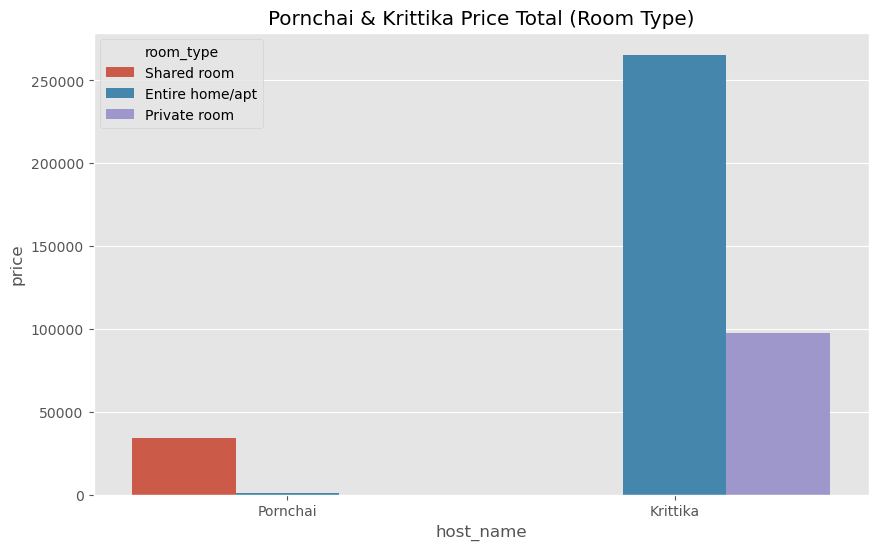

In [37]:
# Specify Neighbourhood
desired_neighbourhood2 = ['Pornchai','Krittika']

# Filter variable
filtered_typeroom2 = df_typeroom2[df_typeroom2['host_name'].isin(desired_neighbourhood2)]

# Plot
plt.figure(figsize=(10,6))
plt.title('Pornchai & Krittika Price Total (Room Type)')
sns.barplot(x='host_name',y='price',
            data = filtered_typeroom2, hue='room_type',
            errorbar=None,
            estimator=np.sum)
plt.show()

- Bar chart di atas ini mengakumulasi total harga listing kepada dua host name yaitu Pornchai dan Krittika, dengan memisahkan variable price dengan variable room_type. Variable ini memiliki 4 categorikal string shared room, entire home/apt, dan private room. Kebetulan kedua dari nama host ini tidak memiliki tipe lodging hotel room, karena itu hanya tertampil 3 tipe saja. Terlihat dari graph ini bahwa gap dari total harga listing dari kedua host name ini sangatlah besar di mana Pornchai dengan total akumlasi harga dari shared room dan entire home/apt tidak mencapai jumlah ฿ 50000. Sedangkan host name Krittika buat entire home/apt melebihi jumlah ฿ 250000, dan untuk private room sedikit kurang dari ฿ 100000.  

Pemfilteran Krittika & Pornchai berdasarkan 'availability_365'

In [15]:
df_bangkok[df_bangkok['host_name']=='Pornchai']['availability_365'].value_counts().head(10)

availability_365
180    29
90     28
364     2
179     2
178     1
358     1
Name: count, dtype: int64

In [16]:
df_bangkok[df_bangkok['host_name']=='Krittika']['availability_365'].value_counts().head(10)

availability_365
365    31
364     4
302     2
363     2
360     1
359     1
362     1
357     1
361     1
Name: count, dtype: int64

In [17]:
host_reviews = df_bangkok['host_name'].value_counts().head(10)
print(host_reviews)

host_name
Curry       228
Noons        99
K            91
Pornchai     63
Bee          62
Alex         62
Dusadee      62
Ed           60
Nana         57
Ludoping     56
Name: count, dtype: int64


Pornchai termasuk dalam list salah satu nama host yang memiliki jumlah listing terbanyak.  

**Summary Analysis**

**Secara keseluruhan analysis di atas sangatlah premature dan abstrak, tetapi analysis ini memberikan kita sedikit konteks dalam pertanyaan kenapa terjadinya Null Values dalam asumsi pattern yang demikian. Berikut adalah penemuan dari hasil filter dan analysis:**
- `Kontributor NaN terbanyak?`: Berdasarkan filter berdasarkan 'host_name' dan pencocokan melalui 'host_id' 5 teratas dari kontributor NaN adalah Pornchai, Zuzu, Krittika, Lek Boonsiri, dan Elmer. 

- `Perbandingan melalui Price Mean`: Berdasarkan bar plot di atas, selain Krittika mereka memiliki rata-rata harga di bawah ฿ 2300. Dimana 'Pornchai' merepresentasikan harga pasar terrendah, sedangkan 'Krittika' mereprsentasikan harga pasar tertinggi.  

- `Perbandingan singkat Pornchai & Krittika?`: Kedua host ini beroperasi di 2 wilayah yang berbeda dan bisa di berikan simpulan awal bahwa wilayah Phra Nakhon berpotensi berada di daerah yang nilainya harga relatif rendah. Sedangkan Khlong Toei dan Vadhana berada di daerah nilai harga relatif tinggi. Dan keduanya memiliki tipe gedung akomodasi yang sangat berbeda di mana Pornchai berada pada tipe 'Shared Room' & Krittika berada pada tipe 'Entire home/apt'. Tetapi Pornchai sepertinya memiliki peminat lebih banyak di bandingkan Krittika berdasarkan angka pada column 'availability_365'. 

- `Kesimpulan Singkat?`: Berdasarkan hasil dari analysis 1 ini, memasang harga terlalu tinggi atau terlalu rendah tidak menjamin mendapatkan impressi dari penyewa. Harga tidak memiliki power yang absolut dalam menarik daya pelanggan, walawpun host Pornchai lebih di minati berdasarkan variable 'availability_365' dan ini secara umum masuk akal di karenakan tourist lebih memikirkan hal rekreasional di bandingkan akomodasi yang bersifat minimal satisfaction. Di mana sifat minimal satisfaction itu menimbulkan sifat acuh tak acuh terhadap pengalaman mereka di listing tersebut, dan juga sebaliknya dengan listing yang berharga mewah seperti host Krittika di mana pelanggan memiliki sifat kuriositas ingin mencobanya sekali saja sehingga tidak menimbulkan rasa sentimental untuk meninggalkan pesan dan kesan mereka. `Tentunya tidak hanya ini, banyak faktor yang mempengaruhi sifat ini terhadap pelanggan yang di mana berada di luar scope variable/column pada dataframe ini apabila adanya tujuan dan sumber daya yang mencukupi.`  

## Analysis 2: Descriptive Statistics

In [18]:
df_bangkok.head()

Unnamed: 0      id                                            name  \
0           0   27934                 Nice room with superb city view   
1           1   27979                  Easy going landlord,easy place   
2           2   28745               modern-style apartment in Bangkok   
3           3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4  941865                      Suite Room 3 at MetroPoint   

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy       Bang Na  13.66818  100.61674     Private room   
2   123784  Familyroom     Bang Kapi  13.75232  100.62402     Private room   
3   153730     Sirilak     Din Daeng  13.78823  100.57256     Private room   
4   610315       Kasem     Bang Kapi  13.76872  100.63338     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905               3                 65  2020-01-06               0.50   
1   1316               1                  0         NaN                NaN   
2    800              60                  0         NaN                NaN   
3   1286               7                  2  2022-04-01               0.03   
4   1905               1                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0

**Normality Test**

In [19]:
df_bangkok[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

price  minimum_nights  number_of_reviews  \
count  1.585400e+04    15854.000000       15854.000000   
mean   3.217704e+03       15.292355          16.654157   
std    2.497212e+04       50.815020          40.613331   
min    0.000000e+00        1.000000           0.000000   
25%    9.000000e+02        1.000000           0.000000   
50%    1.429000e+03        1.000000           2.000000   
75%    2.429000e+03        7.000000          13.000000   
max    1.100000e+06     1125.000000        1224.000000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    15854.000000      15854.000000           15854.000000  
mean                        13.889618        244.378643               3.481519  
std                         30.269848        125.843224               8.916937  
min                          1.000000          0.000000               0.000000  
25%                          1.000000        138.000000               0.000000  
50%                          4.000000        309.000000               0.000000  
75%                         13.000000        360.000000               3.000000  
max                        228.000000        365.000000             325.000000

In [20]:
# Conversion
num_des1 = 1.585400e+04 # Count
num_des2 = 3.217704e+03 # Mean
num_des3 = 2.497212e+04 # Std
num_des4 = 9.000000e+02 # 25%
num_des5 = 1.429000e+03 # 50%
num_des6 = 2.429000e+03 # 75%
num_des7 = 1.100000e+06 # Max
print(num_des7)

1100000.0


- Terlihat dari summary statistics untuk dataframe AirBnB Listing Bangkok ini memiliki distribusi yang tidak normal di karenakan hampir semua kecuali column 'availability_365' memiliki mean yang lebih besar di banding kan median(50%). Dan juga di dukung oleh value standard deviation yang sangat besar yang mengindikasikan sebesar apa spread data dari mean. 

`Histogram`

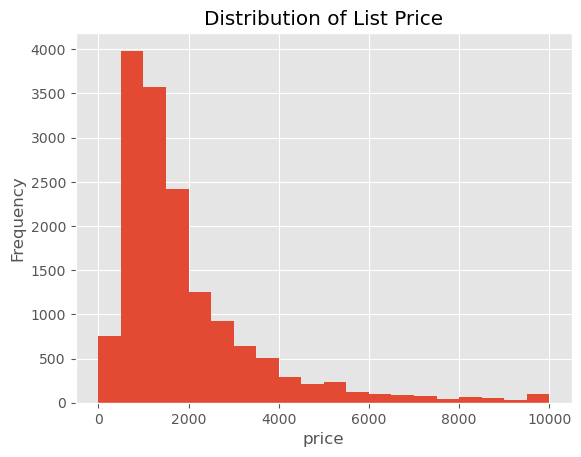

In [21]:
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 4000]
bins1 = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
plt.style.use('ggplot')
plt.hist(df_bangkok['price'],bins=bins1)
plt.ylabel('Frequency')
plt.xlabel('price')
plt.title('Distribution of List Price')
plt.show()

- Histogram di atas menunjukkan di mana dataframe untuk saat ini terlihat tidak normal dan condong ke kanan atau right skewed. 

In [22]:
df_bangkok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

`Kolmogorov Smirnov Test`

Menguji asumsi normalitas variabel `Price`

Alasan memilih Kolmogorov Smirnov Test di bandingkan Shapiro Wilk test: 
- Karena data set yang sangat besar, di mana penggunaan Shapiro Wilk test akan lebih optimal apabila sample size-nya kecil (sekitar 200 sample size).
- Kolmogorov Smirnov test juga lebih efektif dalam menguji distribusi yang memiliki extreme outliers, di mana melalui assessment sebelumnya merupakan kemungkinan yang sangat kuat untuk dataframe ini.

`Interpretation`

* If the P-Value of the KS Test is larger than 0.05, we assume a normal distribution
* If the P-Value of the KS Test is smaller than 0.05, we do not assume a normal distribution

In [23]:
from scipy.stats import kstest

mean = df_bangkok['price'].mean()
std = df_bangkok['price'].std()

kstest(df_bangkok['price'], 'norm', args=(mean, std))


KstestResult(statistic=0.4531155857871902, pvalue=0.0, statistic_location=300, statistic_sign=-1)

In [24]:
ks_statistics, ks_pvalue = kstest(df_bangkok['price'], 'norm', args=(mean, std))

if ks_pvalue > 0.05:
    print(f'P-Value: {ks_pvalue}. Maka data berdistribusi normal')
else:
    print(f'P-Value: {ks_pvalue}. Maka data tidak berdistribusi normal')

P-Value: 0.0. Maka data tidak berdistribusi normal


- Seperti yang terlihat melalui Kolmogorov Smirnov test, P-value mengarah ke 0.0 di mana value 0.0 ini sangat lah kecil dari bentuk aslinya. Hal nya dengan Kolmogorov Smirnov test adalah, semakin besar sample size yang di analisa, semakin sensitif terhadap pendeteksian deviasi. Angka 0.0 tidak merepresentasikan nol secara absolut, melainkan di karenakan sangat kecilnya p-value yang dari hasil komputasi test-nya maka sangat susah untuk merepresentasikannya dalam bentuk desimal yang konvensional. 

`QQ Plot`

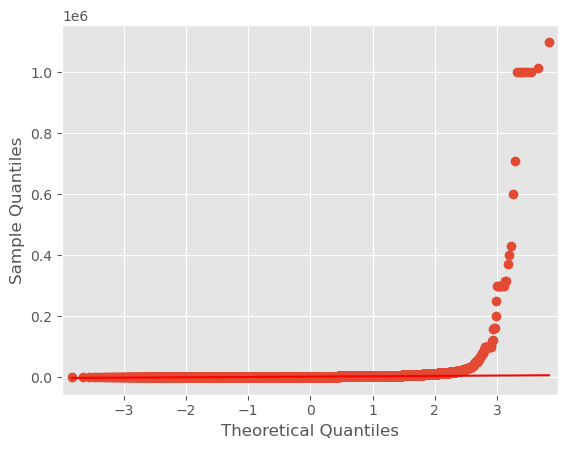

In [25]:
sm.qqplot(df_bangkok['price'], line='q')
py.show()

- Untuk memastikan lebih lanjut mengenai normalisasi distribusi data, qq plot ini di gunakan untuk memperlihat secara visual. Tetapi seperti yang terlihat di atas bahwa spread dari upper case outliers sangat lah extreme ke arah kanan sehingga dapat menekan kebanyakan poin data menjadi datar.  

**Anomaly Check (Outliers)**

`Box-Plot`

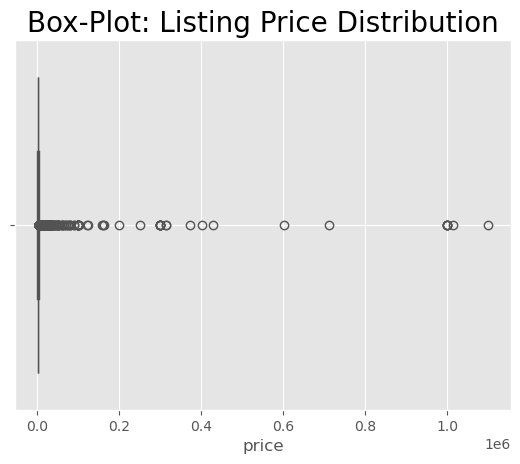

In [26]:
sns.boxplot(x= df_bangkok['price']) 
plt.title('Box-Plot: Listing Price Distribution', size = 20)
plt.grid(True)
plt.show()

- Sama seperti yang terlihat dari qq plot sebelumnya, box-plot yang di tampilkan di atas ini tidak representatif dari normal distribusi dari data di karenakan extreme outliers. Perlu di periksa lebih lanjut dengan menggunakan interquartile range. 

`Interquartile Range (Counting Outliers)`

In [27]:
# Interquartile Range for 'price'
q1_pr = df_bangkok['price'].describe()['25%']
q3_pr = df_bangkok['price'].describe()['75%']

iqr_pr = q3_pr - q1_pr
iqr_pr

1529.0

In [28]:
print(f"Range persebaran harga list/space AirBnB berada di antara ฿{q1_pr} sampai ฿{q3_pr}. Dan juga distribusi persebaran yang banyak dari range list/space AirBnB tersebut sebesar ฿{iqr_pr}Thai Baht.")

Range persebaran harga list/space AirBnB berada di antara ฿900.0 sampai ฿2429.0. Dan juga distribusi persebaran yang banyak dari range list/space AirBnB tersebut sebesar ฿1529.0Thai Baht.


In [29]:
# Deteksi outliers
Upper_Bound_price = q3_pr + 1.5 * iqr_pr
Upper_Bound_price

4722.5

In [30]:
# Filtered Outliers > upper bound
Outliers_price = df_bangkok[df_bangkok['price'] > Upper_Bound_price]
Outliers_price

Unnamed: 0                  id  \
17             17               66046   
18             18              105042   
19             19             1793000   
34             34              978531   
48             48              185364   
...           ...                 ...   
15756       15756  786741911434733026   
15757       15757  786742271004207966   
15765       15765  786834873763460489   
15766       15766  786852847114140309   
15767       15767  786853604983296847   

                                          name    host_id host_name  \
17            24Flr- 1br Apt near JJ, MRT, BTS     323158       Sue   
18         Central Bangkok 3 Bedroom Apartment     545890     Henry   
19            The Duplex - Asoke- Luxury 92sqm    9407280      Timo   
34         Urban Oasis in the heart of Bangkok    5309669  Apiradee   
48         Beautiful Wood Bangkok Resort House     889670   Narumon   
...                                        ...        ...       ...   
15756  Private Home for 12-16 Guests 8 Parking  435016000   Tadchon   
15757           Private Hotel for 12-16 Guests  435016000   Tadchon   
15765           Cozy 1 bedroom 40 sqm, central  434168399  Krittika   
15766           Cozy 1 bedroom 40 sqm, central  434168399  Krittika   
15767             Grandio Ladprao 3 Bed 3 Bath  435016000   Tadchon   

      neighbourhood   latitude   longitude        room_type   price  \
17       Chatu Chak  13.822980  100.564840  Entire home/apt  122594   
18      Khlong Toei  13.733780  100.563030  Entire home/apt    5680   
19          Vadhana  13.746680  100.561370  Entire home/apt    5034   
34           Sathon  13.722910  100.537590  Entire home/apt    5429   
48        Nong Chok  13.779000  100.836710  Entire home/apt    8658   
...             ...        ...         ...              ...     ...   
15756     Lat Phrao  13.827958  100.591895  Entire home/apt   17900   
15757    Chatu Chak  13.821809  100.563067     Private room   17900   
15765       Vadhana  13.735632  100.567862  Entire home/apt    7589   
15766       Vadhana  13.734753  100.566682  Entire home/apt    7589   
15767     Bueng Kum  13.797979  100.659953  Entire home/apt    8900   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
17                  2                  9  2020-03-04               0.09   
18                 28                148  2020-01-07               1.08   
19                 21                287  2022-11-22               2.59   
34                  2                  3  2018-12-18               0.03   
48                  1                  0         NaN                NaN   
...               ...                ...         ...                ...   
15756               2                  0         NaN                NaN   
15757               2                  0         NaN                NaN   
15765               1                  0         NaN                NaN   
15766               1                  0         NaN                NaN   
15767               3                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
17                                  6               180                      0  
18                                  1               334                      0  
19                                  1               349                      3  
34                                  3               174                      0  
48                                  1               363                      0  
...                               ...               ...                    ...  
15756                              10               362                      0  
15757                              10               362                      0  
15765                              44               364                      0  
15766                              44               364                      0  
15767           

In [31]:
count_outliers = len(Outliers_price.index)
print(f"Berdasarkan metode interquartile range method, telah di identifikasi upper outliers dalam column 'price' sebanyak {count_outliers}.")

Berdasarkan metode interquartile range method, telah di identifikasi upper outliers dalam column 'price' sebanyak 1403.


**Additional Filtering Analysis (Using Upperbound)**

In [32]:
df_bangkok[df_bangkok['price']>= 4800]['neighbourhood'].value_counts().head(10)

neighbourhood
Vadhana        375
Khlong Toei    207
Huai Khwang     92
Bang Rak        87
Parthum Wan     79
Ratchathewi     54
Sathon          47
Phra Nakhon     34
Bang Na         28
Suanluang       27
Name: count, dtype: int64

Berdasarkan tampilan di atas Vadhana dan Khlong Toei termasuk dalam daerah yang memiliki listing/area mahal, di bandingkan daerah lainnya.

In [33]:
df_bangkok[df_bangkok['price']>= 4800]['room_type'].value_counts().head()

room_type
Entire home/apt    793
Private room       483
Hotel room          92
Shared room         14
Name: count, dtype: int64

'Entire home/apt' termasuk dalam jenis perumahan yang memiliki jumlah harga yang sangat mahal. Sangat memungkinkan karena berbeda dengan 'private room', 'hotel room', dan 'shared room', di mana dengan 'Entire home/apt' pengunjung dapat menyewa seluruh gedung/space di banding hanya menyewa ruangan dengan skala kecil. 

In [34]:
df_bangkok[df_bangkok['price']>= 4800]['calculated_host_listings_count'].value_counts().head(10)

calculated_host_listings_count
1     370
2     132
6      84
3      82
4      81
21     60
5      55
9      47
10     42
44     42
Name: count, dtype: int64

Melalui tampilan di atas bisa di nyatakan bahwa host yang memiliki lebih dari 3 listing berada di pihak minoritas. 

In [35]:
df_bangkok[df_bangkok['price']>= 4800]['number_of_reviews_ltm'].value_counts().head(10)

number_of_reviews_ltm
0     926
1     115
2      54
4      29
5      28
3      25
14     15
9      15
8      14
6      14
Name: count, dtype: int64

**Investigating Null Values: Follow up Analysis**

Berdasarkan tampilan di atas dalam waktu 12 bulan terakhir, listing yang berada pada bagian group mahal (>= ฿ 4800) banyak yang tidak memiliki review dari pelanggan. Sebagai dari tambahan analysis sebelumnya mengenai pattern dari Null Values, bisa di perkirakan bahwa tidak memungkinkan adanya faktor dari harga mewah dengan fasilitas yang sesuai harga itu mempengaruhi kemauan pelanggan untuk meninggalkan review.  

## Analysis 3: Data Transformation

**Removing NaN**

Values NaN dari dataframe ini lebih banyak terjadi pada column berformat datetime, di mana sebelumnya telah diketahui lebih dari 35% values missing di column 'last_review' & 'reviews_per_month'. Untuk mempermudah dan mengimprove efektifitas dari EDA ini serta menciptakan konsistensi terhadap problem statement sebelumnya, di mana listing yang memiliki review adalah aspek yang sangat esssential dalam analysis in secara keseluruhan. Oleh karena itu perlunya kami lakukan drop/removal dari value NaN tersebut. Jika tidak di lakukan akan menimbulakan analysis yang tidak `representatif.`

**Decision rule using Domain Knowledge**

`Mengapa 5000 Thai Baht?`
- Akan dilakukan perbandingan antar mata uang dan hasil dari interquartile range. Pada bulan Desember 2024, ฿5000 = $236.31 Australia. Telah di putuskan dollar Australia menjadi salah satu pembanding currency dikarenakan kuatnya mata uang Australia di bandingkan Thailand, di mana ini akan menjadi highly estimated benchmark yang dapat di gunakan untuk mengukur harga dari listing yang ada di Thailand. 
- Secondary comparison juga akan dilakukan dengan IDR, di karenakan salah satu situs acuan sekunder yang di gunakan adalah Airbnb di mana Rupiah tertampil sebagai currency system akomodasi di Bangkok. 
1. Menurut statista.com rata-rata tarif harian hotel di Australia yang paling tinggi berada di 'Gold Coast' yang bernilai $274 Australi (฿5797.43). Bahkan rata-rata tarif ter-rendah brada di 'Canberra' senilai $201 Australi (฿4252.86). 
2. Di situs Airbnb kita bisa mem-filter sesuai popularitas/guest favorite, kebanyak dari filter popularitas harga berada dalam range  Rp350rb - Rp1.5Jt (฿734.47 - ฿3147.71). 
3. Dan sesuai interquartile range, Q1 dan Q3 memiliki range ฿900 - ฿2429. Dan dimana upperbound yang merepresentasikan batas outliers(s) tinggi adalah ฿4722.5. 
4. Analysis yang menggunakan data dari `statista` merepresentasikan perbandingan extreme dan investigasi menggunakan situs `airbnb` merepresentasikan perbandingan realistis, sedangkan `interquartile range` adalah analysis secara numerik. Berdasarkan informasi dan pertimbangan dari 3 cara ini, telah mendukung putusan untuk menetapkan value yang berada di atas ฿5000 layak di drop, khususnya untuk daerah populer bagi turis seperti Bangkok. 

(Source: https://www.statista.com/statistics/1372753/australia-average-daily-rate-of-hotels-by-select-city-or-region/#:~:text=As%20of%20December%202023%2C%20the%20area%20with,average%20daily%20rate%20of%20201%20Australian%20dollars.)

In [38]:
df_bangkok.head()

Unnamed: 0      id                                            name  \
0           0   27934                 Nice room with superb city view   
1           1   27979                  Easy going landlord,easy place   
2           2   28745               modern-style apartment in Bangkok   
3           3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4  941865                      Suite Room 3 at MetroPoint   

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy       Bang Na  13.66818  100.61674     Private room   
2   123784  Familyroom     Bang Kapi  13.75232  100.62402     Private room   
3   153730     Sirilak     Din Daeng  13.78823  100.57256     Private room   
4   610315       Kasem     Bang Kapi  13.76872  100.63338     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905               3                 65  2020-01-06               0.50   
1   1316               1                  0         NaN                NaN   
2    800              60                  0         NaN                NaN   
3   1286               7                  2  2022-04-01               0.03   
4   1905               1                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0

**Converting DateTime**

In [39]:
df_bangkok['last_review'] = pd.to_datetime(df_bangkok['last_review'], format="mixed", errors='coerce')

In [40]:
df_bangkok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      15854 non-null  int64         
 1   id                              15854 non-null  int64         
 2   name                            15846 non-null  object        
 3   host_id                         15854 non-null  int64         
 4   host_name                       15853 non-null  object        
 5   neighbourhood                   15854 non-null  object        
 6   latitude                        15854 non-null  float64       
 7   longitude                       15854 non-null  float64       
 8   room_type                       15854 non-null  object        
 9   price                           15854 non-null  int64         
 10  minimum_nights                  15854 non-null  int64         
 11  nu

**Removing Outliers**

In [41]:
df_drop_new = df_bangkok.drop(df_bangkok[df_bangkok['price'] > 5000].index, inplace=True)

In [42]:
df_bangkok.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14668 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      14668 non-null  int64         
 1   id                              14668 non-null  int64         
 2   name                            14660 non-null  object        
 3   host_id                         14668 non-null  int64         
 4   host_name                       14667 non-null  object        
 5   neighbourhood                   14668 non-null  object        
 6   latitude                        14668 non-null  float64       
 7   longitude                       14668 non-null  float64       
 8   room_type                       14668 non-null  object        
 9   price                           14668 non-null  int64         
 10  minimum_nights                  14668 non-null  int64         
 11  number_

**Removing NaN**

In [43]:
# Droping NaN data
df_BK_new = df_bangkok.dropna(subset=['name', 'host_name', 'last_review', 'reviews_per_month'])

In [44]:
df_BK_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9420 entries, 0 to 15796
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      9420 non-null   int64         
 1   id                              9420 non-null   int64         
 2   name                            9420 non-null   object        
 3   host_id                         9420 non-null   int64         
 4   host_name                       9420 non-null   object        
 5   neighbourhood                   9420 non-null   object        
 6   latitude                        9420 non-null   float64       
 7   longitude                       9420 non-null   float64       
 8   room_type                       9420 non-null   object        
 9   price                           9420 non-null   int64         
 10  minimum_nights                  9420 non-null   int64         
 11  number_o

**Rule of Thumb:** Semakin besar dataset yang ada semakin representatif menggunakan metode visualisasi melainkan test statistik, di karenakan test statistik jauh lebih sensitif semakin banyaknya sample yang ada dalam dataframe. 

QQ-Plot

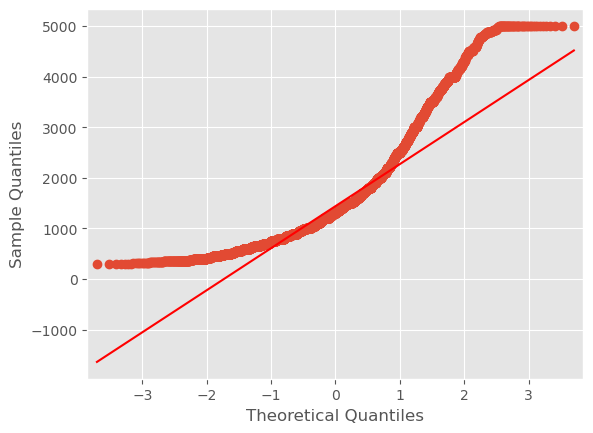

In [45]:
sm.qqplot(df_BK_new['price'], line='q')
py.show()

Box-Plot

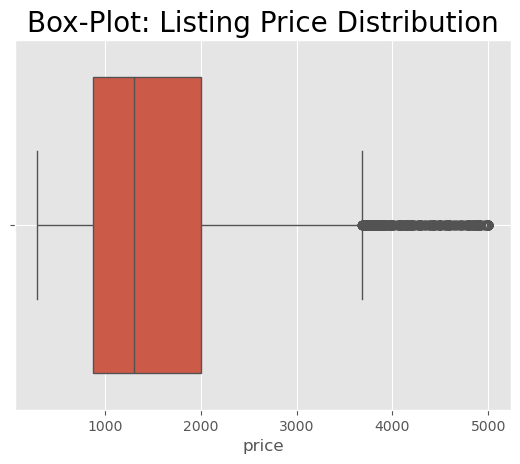

In [46]:
sns.boxplot(x= df_BK_new['price']) 
plt.title('Box-Plot: Listing Price Distribution', size = 20)
plt.grid(True)
plt.show()

Histogram

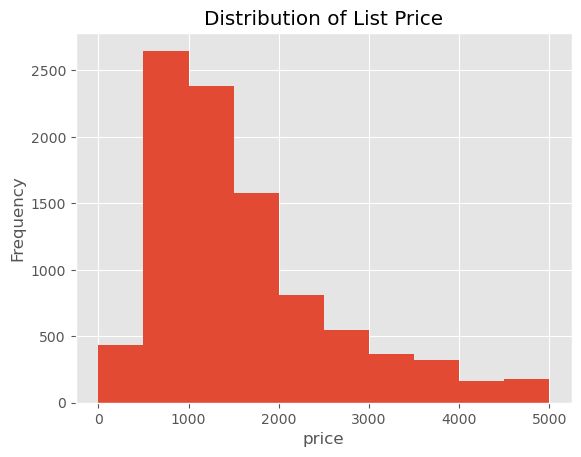

In [47]:
bins1 = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
plt.style.use('ggplot')
plt.hist(df_BK_new['price'],bins=bins1)
plt.ylabel('Frequency')
plt.xlabel('price')
plt.title('Distribution of List Price')
plt.show()

**Hasil Visualisasi:** 
- Dari tiga graik di atas, terlihat bahwa masih terjadi skewness dari dataframe tersebut. Tetapi seperti yang di jelaskan dalam decision rule based on domain knowledge, menyimpan beberapa outliers ini sangat esensial untuk analysis data. Tetapi quantile line dari QQ-plot sudah terbebani dengan extreme outliers di mana dapat membentuk garis diagonal. 
- Dari hasil box-plot sudah terlihat box distribusi-nya dan dapat terlihat jelas garis median dari distribusi tersebut. 
- Untuk histogram walawpun masih terlihat jelas skewness dari distribusinya, tetapi terlihat bahwa distribusi semakin mendekat ke median dari data 'price'.

**Transforming Numerical Values into a new category column**

price --> category

Category: 
- Between ฿0 - ฿899.99 (Cheap)
- Between ฿900 - ฿2099.99 (Affordable)
- Greater than ฿2100 (Expensive)

In [48]:
df_BK_new['price_group'] = df_BK_new['price'].apply(lambda x: 'Cheap' if x < 900 else('Affordable' if x < 2100 else 'Expensive'))

minimum_nights --> category

Category: 
- Beteween 0 - 30 days (Short Term)
- Between 31 - 365 days (Long Term)

In [49]:
df_BK_new['rental_term'] = df_BK_new['minimum_nights'].apply(lambda x: 'Short-term' if x < 31 else 'Long-term')

Source: https://govos.com/blog/short-term-rental-overview/

availability_365 --> category

Category: 
- Less than 1 day (Fully Booked)
- Between 1 - 30 days (Nearly Full)
- Between 31 - 280 days (Partially Full)
- Greater than 280 days (Available)

In [50]:
df_BK_new['yearly_book'] = df_BK_new['availability_365'].apply(lambda x: 'Fully Booked' if x < 1 else('Nearly Full' if x < 31 else('Partially Full' if x < 281 else 'Available')))

In [51]:
df_BK_new.head()

Unnamed: 0       id                                            name  \
0           0    27934                 Nice room with superb city view   
3           3    35780  Spacious one bedroom at The Kris Condo Bldg. 3   
5           5  1704776                  NEw Pro!!  Bungalow Bkk Centre   
6           6    48736                 Condo with Chaopraya River View   
8           8  1744248              Batcave, Pool view, near Chatuchak   

   host_id host_name  neighbourhood  latitude  longitude        room_type  \
0   120437    Nuttee    Ratchathewi  13.75983  100.54134  Entire home/apt   
3   153730   Sirilak      Din Daeng  13.78823  100.57256     Private room   
5  2129668  Wimonpak  Bang Kho laen  13.69757  100.52880  Entire home/apt   
6   222005  Athitaya     Rat Burana  13.68556  100.49535     Private room   
8  9181769       Nol     Chatu Chak  13.81693  100.56433  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905               3                 65  2020-01-06               0.50   
3   1286               7                  2  2022-04-01               0.03   
5   1000             250                 19  2017-08-03               0.17   
6   1558               3                  1  2014-02-03               0.01   
8   1558               3                 10  2016-03-29               0.09   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               353                      0   
3                               1               323                      1   
5                              41               365                      0   
6                               1               365                      0   
8                               1               365                      0   

  price_group rental_term yearly_book  
0  Affordable  Short-term   Available  
3  Affordable  Short-term   Available  
5  Affordable   Long-term   Available  
6  Affordable  Short-term   Available  
8  Affordable  Short-term   Available

In [52]:
df_BK_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9420 entries, 0 to 15796
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      9420 non-null   int64         
 1   id                              9420 non-null   int64         
 2   name                            9420 non-null   object        
 3   host_id                         9420 non-null   int64         
 4   host_name                       9420 non-null   object        
 5   neighbourhood                   9420 non-null   object        
 6   latitude                        9420 non-null   float64       
 7   longitude                       9420 non-null   float64       
 8   room_type                       9420 non-null   object        
 9   price                           9420 non-null   int64         
 10  minimum_nights                  9420 non-null   int64         
 11  number_o

In [53]:
df_BK_new[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  9420.000000     9420.000000        9420.000000        9420.000000   
mean   1586.232166       13.123142          26.426858           0.812869   
std     987.232964       41.795298          49.046233           1.091964   
min     295.000000        1.000000           1.000000           0.010000   
25%     880.000000        1.000000           2.000000           0.120000   
50%    1300.000000        2.000000           8.000000           0.440000   
75%    2000.000000        7.000000          28.000000           1.060000   
max    5000.000000     1125.000000        1224.000000          19.130000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                     9420.000000       9420.000000            9420.000000  
mean                        17.330042        230.383864               5.453715  
std                         36.149110        125.344858              10.684527  
min                          1.000000          0.000000               0.000000  
25%                          2.000000        119.000000               0.000000  
50%                          6.000000        271.000000               2.000000  
75%                         19.000000        352.000000               6.000000  
max                        228.000000        365.000000             325.000000

Note: Setelah melakukan transformation data terutamanya dalam penyisihan outliers dan penyingkiran nilai NaN, berdasarkan summary dari descriptive statistics di atas mayoritas dari variable/column ini memiliki nilai mean dan median yang tidak berjarak jauh. 

In [71]:
# saving the file
import os

# Define the directory path
directory = 'Project'

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(directory):
    os.makedirs(directory)

df_BK_new.to_csv('./Project/df_drop_BK.csv', index=False)

## Analysis 4: Data Visualization (Trends, Ideal Listing Characteristic,) 

**Exploratory**

In [54]:
# Mencari min max datetime untuk meng-group menjadi tahun saja
min_date = df_BK_new['last_review'].min()
max_date = df_BK_new['last_review'].max()
print(min_date)

2012-12-15 00:00:00


In [55]:
# Group by Date
df_BK_new['last_review'] = pd.to_datetime(df_BK_new['last_review'])

filtered_date = df_BK_new[(df_BK_new['last_review'] >= '2012-01-01') & (df_BK_new['last_review'] <= '2022-12-31')]

filtered_date['year'] = filtered_date['last_review'].dt.year
filtered_date_group = filtered_date.groupby('year').size()

filtered_date_group.head(11)

year
2012       1
2013       7
2014       8
2015      48
2016     142
2017     253
2018     441
2019     930
2020    1166
2021     192
2022    6232
dtype: int64

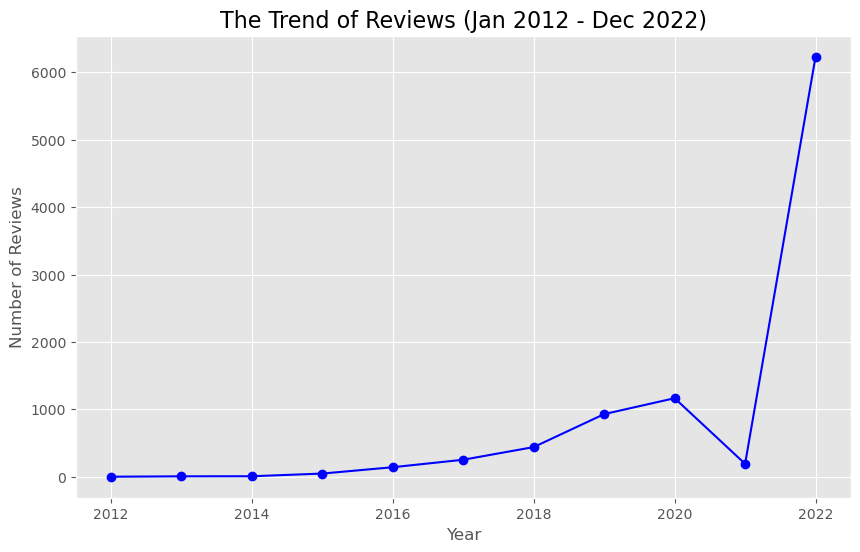

In [56]:
#Plot line graph
plt.figure(figsize=(10, 6))
filtered_date_group.plot(kind='line', marker='o', color= 'blue', linestyle='-')

plt.title("The Trend of Reviews (Jan 2012 - Dec 2022)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)

plt.grid(True)
plt.show()

- Berikut adalah trend dari tiap listing yang pernah mendapatkan review sepanjang tahun dari 2012 - 2022, melalui line plot. Secara inisial bisa di perhatikan bahwa mulai dari 2012 sampai 2015 tidak banyak nya listing mendapatkan review dan ini menggambarkan gimana pelanggan masih belom terasimilasi sepenuhnya menggunakan website airbnb di mana 2012 adalah 5 tahun setelah pertamanya website/platform airbnb di kenalkan dalam jaringan internet. Dan tidak sampai tahun 2016 telah adanya peningkatan secara gradual dalam listing mendapatkan review sampai tahun 2020 puncaknya untuk saat itu. Terlihat secara jelas adanya penurunan mulai tahun 2020 menuju ke 2021, dan kita tau bahwa pada saat itu dunia telah terkena pukulan COVID-19 di mana pembatasan travel telah di mulai. Dan dalam menuju tahun 2022, di mana negara-negara sudah mencabut restriksi travel dan bertambahnya orang terasimilasi dengan teknologi dan internet, ini ter-refleksi dengan peningkatan pesatnya lisitng mendapatkan review.    

In [57]:
# Review Trend
df_BK_new['last_review'] = pd.to_datetime(df_BK_new['last_review'])

filtered_date = df_BK_new[(df_BK_new['last_review'] >= '2012-01-01') & (df_BK_new['last_review'] <= '2022-12-31')]

filtered_date['year'] = filtered_date['last_review'].dt.year
filtered_price_group = filtered_date.groupby(['year', 'price_group']).size().reset_index(name='review_count')

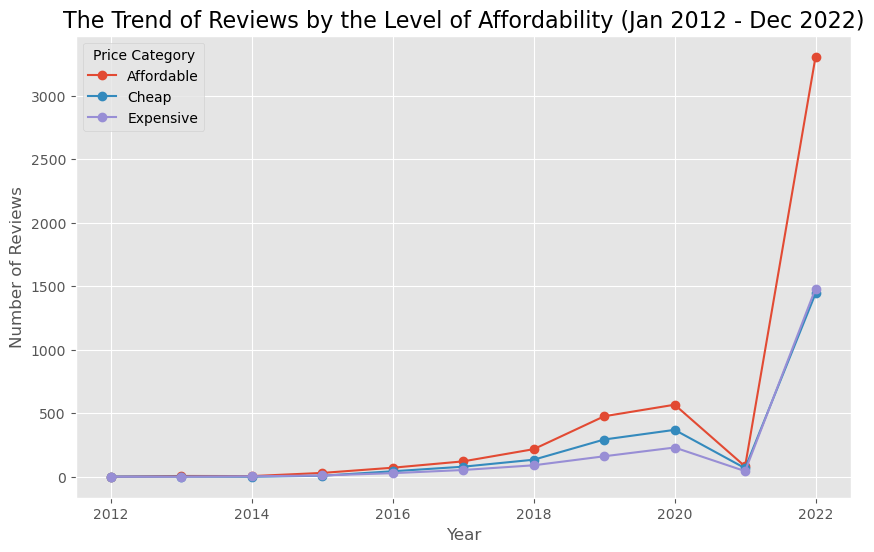

In [58]:
# Pivot
pivoted_price = filtered_price_group.pivot(index='year', columns='price_group', values='review_count').fillna(0)

#Plot line graph
plt.figure(figsize=(10, 6))
for col in pivoted_price.columns: 
    plt.plot(pivoted_price.index, pivoted_price[col], marker='o', label=col)

plt.title("The Trend of Reviews by the Level of Affordability (Jan 2012 - Dec 2022)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.legend(title='Price Category')
plt.grid(True)
plt.show()

- Line plot di atas ini adalah perkembangan atau trend reviews dari listing yang ada, dan dibedakan dengan harga yang di kategorikan sebagai berikut, murah (cheap), terjangkau (affordable), dan mahal (expensive). Trend ini mirip dengan trend dari keseluruhan listing yang mendapatkan review dari tahun 2012 sampai dengan tahun 2022. Tetapi kalau bisa kita lihat dari tahun 2016 - 2020, tidak banyaknya perbedaan signifikan dari kalangan murah, terjangkau, dan mahal. Ini mungin disebabkan oleh stabilnya perekonomian sebelum COVID-19, di mana prefrensi pelanggan belum terbentuk dengan jelas. Dari tahun 2021 ke 2022 kita bisa melihat perbedaan yang sangat besar antara kategori terjangkau dan mahal serta murah, hampir mencapai 2100 reviews. Menariknya berdasarkan jumlah reviews, gap antara para review dari kategori murah dan mahal semakin menipis. 

In [59]:
# tampilan pivot table berdasarkan line plot
pivoted_price.head(11)

price_group  Affordable   Cheap  Expensive
year                                      
2012                0.0     1.0        0.0
2013                6.0     1.0        0.0
2014                5.0     0.0        3.0
2015               30.0     8.0       10.0
2016               71.0    43.0       28.0
2017              121.0    79.0       53.0
2018              217.0   134.0       90.0
2019              476.0   293.0      161.0
2020              567.0   369.0      230.0
2021               81.0    67.0       44.0
2022             3307.0  1443.0     1482.0

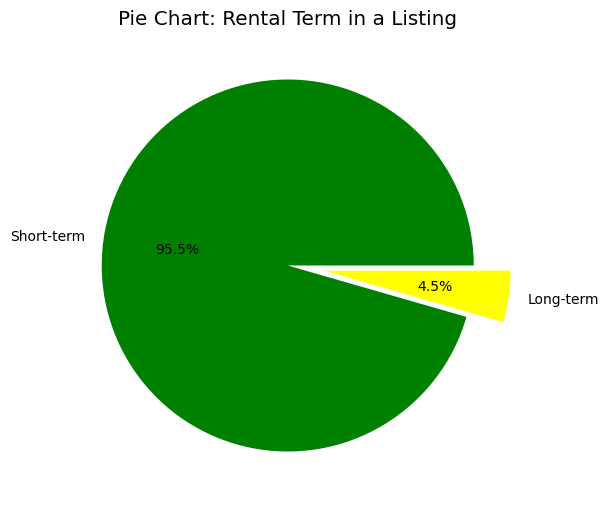

In [60]:
typee = df_BK_new["rental_term"].value_counts()
plt.figure(figsize=(6, 8))
explode = (0,0.2)
typee.plot.pie(autopct="%1.1f%%", colors=["Green", "yellow"], explode = explode)
plt.title("Pie Chart: Rental Term in a Listing")
plt.ylabel("") 
plt.show()

- Kita bisa lihat dari pie chart di atas bahwa proporsi dari jangka waktu sewa masi di dominasi dengan Short-Term lease dengan persentase 95.5%.  

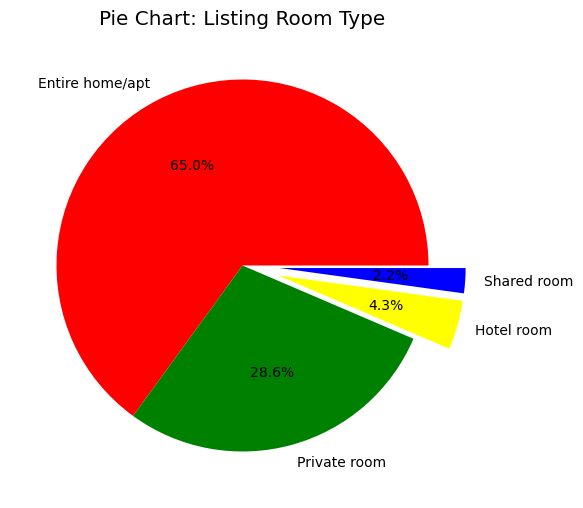

In [61]:
typee = df_BK_new["room_type"].value_counts()
plt.figure(figsize=(6, 8))
explode = (0,0,0.2,0.2)
typee.plot.pie(autopct="%1.1f%%", colors=["red", "green", "yellow", "blue"], explode = explode)
plt.title("Pie Chart: Listing Room Type")
plt.ylabel("") 
plt.show()

- Dari keseluruhan listing di dataframe Airbnb Bangkok, entire home/apt merupakan prefrensi yang paling populer di antara banyak listing dengan 65 %, diikuti oleh private room dengan 28.6 %. Di lain sisi hotel room dengan 4.3 % dan shared room dengan 2.2 % berada di kalangan yang sedikit. 

In [62]:
# Filter 10 besar neighbourhood berdasarkan jumlah listing 
neighbours = df_BK_new['neighbourhood'].value_counts().head(10)
print(neighbours)

neighbourhood
Khlong Toei     1498
Vadhana         1210
Ratchathewi      739
Huai Khwang      686
Sathon           554
Bang Rak         551
Phra Nakhon      374
Phra Khanong     334
Phaya Thai       297
Chatu Chak       280
Name: count, dtype: int64


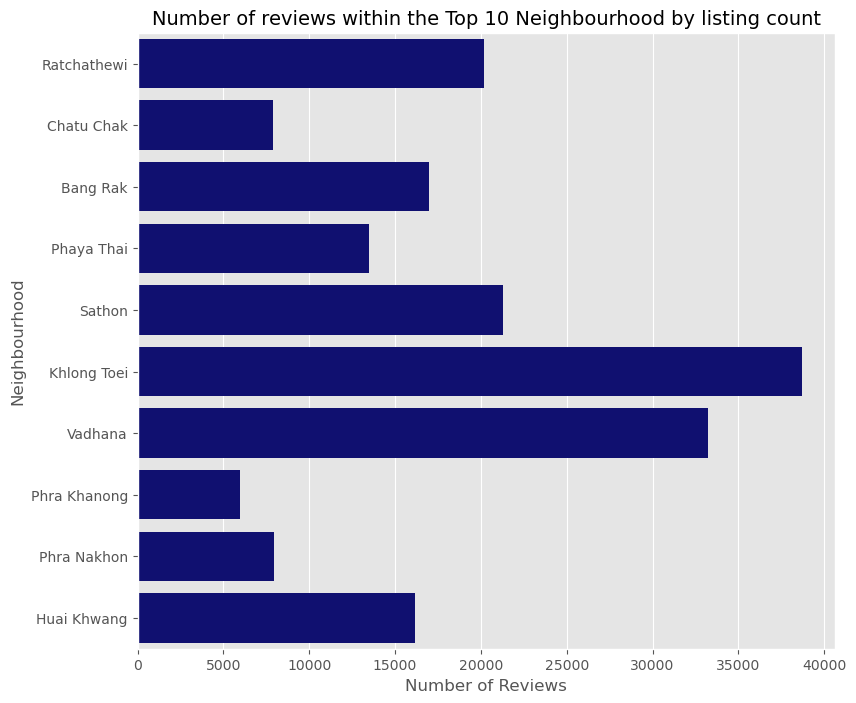

In [63]:
neighbours_of_interest = ['Khlong Toei', 'Vadhana', 'Ratchathewi', 'Huai Khwang', 'Sathon', 'Bang Rak', 'Phra Nakhon', 'Phra Khanong', 'Phaya Thai', 'Chatu Chak']  
df_filtered_neigh = df_BK_new[df_BK_new['neighbourhood'].isin(neighbours_of_interest)]

# Create plot
plt.figure(figsize=(9, 8))
sns.barplot(data=df_filtered_neigh, x='number_of_reviews', y='neighbourhood', estimator='sum', errorbar=None, color='navy')
plt.title('Number of reviews within the Top 10 Neighbourhood by listing count', size=14)
plt.xlabel('Number of Reviews')
plt.ylabel('Neighbourhood')
plt.show()

- Bar plot di atas menghasilkan sebuah perbandingan antara 10 neighbourhood/wilayah, dengan total review yang telah di miliki listing. Wilayah Khlong Toei menempati posisi pertama dengan jumlah review sedikit di atas 37000, diikuti oleh Vadhana dengan jumlah kurang lebih di atas 33000 dan juga wilayah Sathon menempati posisi 3 dengan jumlah sedikit di atas 21000. Antara posisi kedua (Vadhana) dan ketiga (Sathon) memiliki gap review yang lebih besar di bandingkan posisi pertama (Khlong Toei) dan kedua.

**Note: Seleksi 10 neighbourhood bar graph di atas berdasarkan filter value count sebelumnya**

In [64]:
df_BK_new.head()

Unnamed: 0       id                                            name  \
0           0    27934                 Nice room with superb city view   
3           3    35780  Spacious one bedroom at The Kris Condo Bldg. 3   
5           5  1704776                  NEw Pro!!  Bungalow Bkk Centre   
6           6    48736                 Condo with Chaopraya River View   
8           8  1744248              Batcave, Pool view, near Chatuchak   

   host_id host_name  neighbourhood  latitude  longitude        room_type  \
0   120437    Nuttee    Ratchathewi  13.75983  100.54134  Entire home/apt   
3   153730   Sirilak      Din Daeng  13.78823  100.57256     Private room   
5  2129668  Wimonpak  Bang Kho laen  13.69757  100.52880  Entire home/apt   
6   222005  Athitaya     Rat Burana  13.68556  100.49535     Private room   
8  9181769       Nol     Chatu Chak  13.81693  100.56433  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905               3                 65  2020-01-06               0.50   
3   1286               7                  2  2022-04-01               0.03   
5   1000             250                 19  2017-08-03               0.17   
6   1558               3                  1  2014-02-03               0.01   
8   1558               3                 10  2016-03-29               0.09   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               353                      0   
3                               1               323                      1   
5                              41               365                      0   
6                               1               365                      0   
8                               1               365                      0   

  price_group rental_term yearly_book  
0  Affordable  Short-term   Available  
3  Affordable  Short-term   Available  
5  Affordable   Long-term   Available  
6  Affordable  Short-term   Available  
8  Affordable  Short-term   Available

**Find the Ideal Listing(s)**

- Tujuan dari bagian analysis ini adalah untuk mencari listing mana saja yang memiliki jumlah review yang banyak, di mana dapat di gunakan sebagai benchmark dari EDA ini untuk menyelidiki attribute yang essential dalam menjalankan Airbnb service di Bangkok. Yang bisa di perhatikan dalam hasil tabular di bawah ini, dimana dari seluruh nama host di dataframe ini, siapa saja host yang memiliki jumlah review 5 terbanyak. Dari hasil 5 nama host yang akan di dapatkan, akan di lakukan pemfilteran berlanjut berdasarkan jumlah review dari satu listing terbanyak yang di miliki oleh 5 nama host yang telah di seleksi sebelumnya.    

In [65]:
result_host_reviews = (
    df_BK_new
    .groupby('host_name', as_index=False)['number_of_reviews']
    .sum()
    .rename(columns={'number_of_reviews': 'sum_of_review'})
    .sort_values('sum_of_review', ascending=False)
    .reset_index(drop=True)
    )

print(result_host_reviews)

       host_name  sum_of_review
0           Evan           6117
1           Tony           5010
2          Curry           4450
3     Themustang           3584
4              K           2956
...          ...            ...
3106       Panya              1
3107      Tipwan              1
3108   Pantheera              1
3109    Titiporn              1
3110      Deepak              1

[3111 rows x 2 columns]


Dari hasil pemfilteran di atas terdapat nama host berikut yaitu, Evan, Tony, Curry, Themustang, K yang memiliki jumlah review 5 teratas. 

**Looking for (Evan, Tony, Curry, Themustang, K)**

In [66]:
result_host_reviews = (
    df_BK_new
    .groupby('host_name', as_index=False)['number_of_reviews']
    .max()
    .rename(columns={'number_of_reviews': 'sum_of_review'})
    .sort_values('sum_of_review', ascending=False)
    .reset_index(drop=True)
    )

print(result_host_reviews.head(28))

                    host_name  sum_of_review
0                     Suchada           1224
1                      Pailin            807
2                   Wuthiphon            533
3                  Themustang            486
4                         Bee            472
5                    Auttapon            451
6                        Evan            430
7                         Paw            406
8                         Bua            402
9                         Pim            384
10                       Alex            383
11                        Mam            374
12                  Suttaporn            363
13                        Kay            348
14                        Max            345
15                     Tatiya            332
16                       Pupe            331
17                       Phil            330
18                        Tor            330
19                       Diow            323
20                    Rebecca            322
21        

Dari hasil pemfilteran maximum number of review per list, hanya Themustang dan Evan yang memiliki jumlah review terbanyak dengan jumlah 486 dan 430 secara berurut. 

Comparing Listing

In [67]:
df_BK_new[df_BK_new['number_of_reviews'] == 486]

Unnamed: 0       id                             name   host_id  \
905         905  5964843  The Mustang Nero/No.4 The Horse  30963587   

      host_name neighbourhood  latitude  longitude   room_type  price  \
905  Themustang   Khlong Toei  13.71143   100.5939  Hotel room   2329   

     minimum_nights  number_of_reviews last_review  reviews_per_month  \
905               1                486  2022-12-06               5.26   

     calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
905                              10                47                      6   

    price_group rental_term     yearly_book  
905   Expensive  Short-term  Partially Full

In [68]:
df_BK_new[df_BK_new['number_of_reviews'] == 430]

Unnamed: 0      id                    name  host_id host_name  \
80          80  393066  ✺✺99 feet in the sky✺✺  1927968      Evan   

   neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
80        Sathon  13.72062  100.54707  Entire home/apt    829               1   

    number_of_reviews last_review  reviews_per_month  \
80                430  2022-10-01               3.39   

    calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
80                              37               334                     10   

   price_group rental_term yearly_book  
80       Cheap  Short-term   Available

Terdapat attribute dari host name Themustang dan Evan yang terdapat asumsi bahwa kedua listing ini memiliki karakteristik yang ideal dan krusial buat Exploratory Data Analysis ini. Sekilas dua listing ini yang di miliki oleh host Themustang dan Evan memiliki karakteristik perbedaan dan kesamaan yang unik:  
- `neighbourhood`: Keduanya berada dalam lokasi 3 besar wilayah yang memiliki review terbanyak (menurut barplot biru). 

- `room_type`: Keduanya beroperasi di tipe listing yang berbeda, dimana Themustang beroperasi dalam tipe 'Hotel room' sedangkan Evan dengan 'Entire home/apt'. 

- `price & price_group`: Keduanya memiliki strategi penetapan harga yang berbeda. Themustang memasangkan harganya jauh lebih besar di bandingkan Evan, tetapi dalam keseluruhan harga listing Themustang masi dalam kalangan 'mahal' sedangkan Evan terkategori dalam kalangan 'murah'. 

- `minimum_nights & rental_term`: Keduanya memiliki ketentuan masa tinggal 'Short-Term'. 

- `number_of_reviews`: Jumlah maximum review yang relatif tinggi untuk kedu listing ini dengan jumlah 486 dan 430.

- `reviews_per_month`: Memiliki nilai reviews melebihi 3 per bulan. 

- `calculated_host_listings_count`: Memiliki jumlah listing yang berbeda, dengan perbedaan 27 listing lebih dimiliki oleh Evan. 

- `number_of_reviews_ltm & yearly_book`: Dalam waktu 12 bulan terakhir memiliki jumlah review yang positif dengan jumlah 6 dan 10 reviews. Dan Themustang memiliki bookingan secara relatif banyak, dengan status 'Partially Full' yang di milikinya, berbeda dengan Evan dengan status 'Available'.    

In [69]:
result_host_listingCT = (
    df_BK_new
    .groupby('host_name', as_index=False)['calculated_host_listings_count']
    .max()
    .rename(columns={'calculated_host_listings_count': 'host_listing_count'})
    .sort_values('host_listing_count', ascending=False)
    .reset_index(drop=True)
    )

print(result_host_listingCT.head(185))

      host_name  host_listing_count
0         Curry                 228
1         Noons                  99
2             K                  89
3       Dusadee                  62
4      Pornchai                  62
..          ...                 ...
180      Angela                  10
181          Jj                  10
182     Sukanya                  10
183  Themustang                  10
184      Chatri                  10

[185 rows x 2 columns]


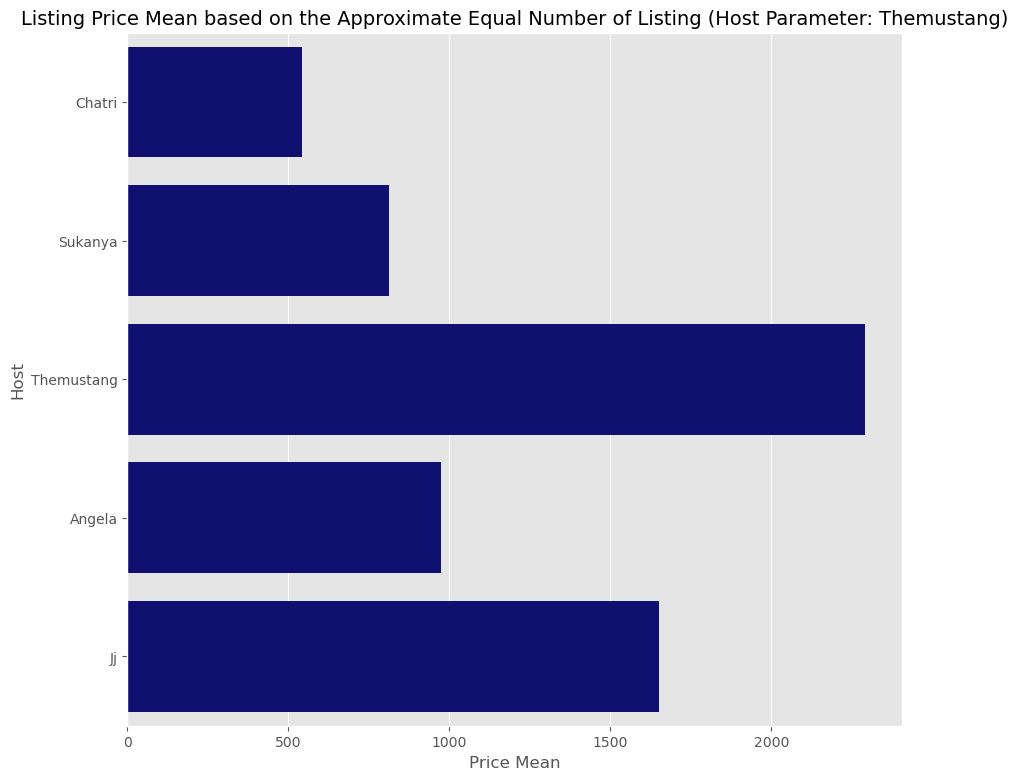

In [70]:
host_of_interest = ['Angela', 'Sukanya', 'Jj', 'Chatri', 'Themustang']  
df_filtered = df_BK_new[df_BK_new['host_name'].isin(host_of_interest)]

# Create plot
plt.figure(figsize=(10, 9))
sns.barplot(data=df_filtered, x='price', y='host_name', estimator='mean', errorbar=None, color='navy')
plt.title('Listing Price Mean based on the Approximate Equal Number of Listing (Host Parameter: Themustang)', size=14)
plt.xlabel('Price Mean')
plt.ylabel('Host')
plt.show()


- Berikut seperti liat di atas adalah tampilan sebuah bar chart dari Mean dari column price dan host Themustang sebagai parameter. Demi membentuk comparative representation yang fair, host yang akan digunakan untuk bar graph ini juga melewati seleksi/pem-filteran di karenakan sifat alami dari Mean adalah semakin banyak jumlah list yang di miliki oleh host semakin mempengaruhi hasilnya, di mana itu host Themustang hanya memiliki 10 buah listing maka perlu perbandingan host lain yang memiliki jumlah list yang sama ataupun mendekati kesamaan itu.
- Setelah pemfilteran melalui group by, host yang di gunakan sebagai perbandingan terhadap Themustang adalah Chatri, Jj, Sukanya, dan Angela. Di mana kita bisa menyimpulkan dari bar chart di atas bahwa Themustang memiliki rata-rata harga listing yang paling tinggi, dan ini mengindikasikan bahwa Themustang beroperasi dalam pemasangan harga yang cukup tinggi. 

In [71]:
result_host_listingCT = (
    df_BK_new
    .groupby('host_name', as_index=False)['calculated_host_listings_count']
    .max()
    .rename(columns={'calculated_host_listings_count': 'host_listing_count'})
    .sort_values('host_listing_count', ascending=False)
    .reset_index(drop=True)
    )

print(result_host_listingCT.head(28))

        host_name  host_listing_count
0           Curry                 228
1           Noons                  99
2               K                  89
3         Dusadee                  62
4        Pornchai                  62
5        Ludoping                  56
6       Kiattisak                  53
7            Nana                  49
8            Mike                  49
9           Panda                  48
10      Ken-Bambu                  48
11  ISanook Hotel                  45
12     Hi Gravity                  45
13       Krittika                  44
14         Tricia                  44
15            Eva                  44
16            Kim                  44
17       Wimonpak                  41
18   Lek Boonsiri                  41
19          Alice                  40
20         George                  40
21         Sophia                  39
22          Patty                  39
23           Evan                  37
24          Windy                  37
25         J

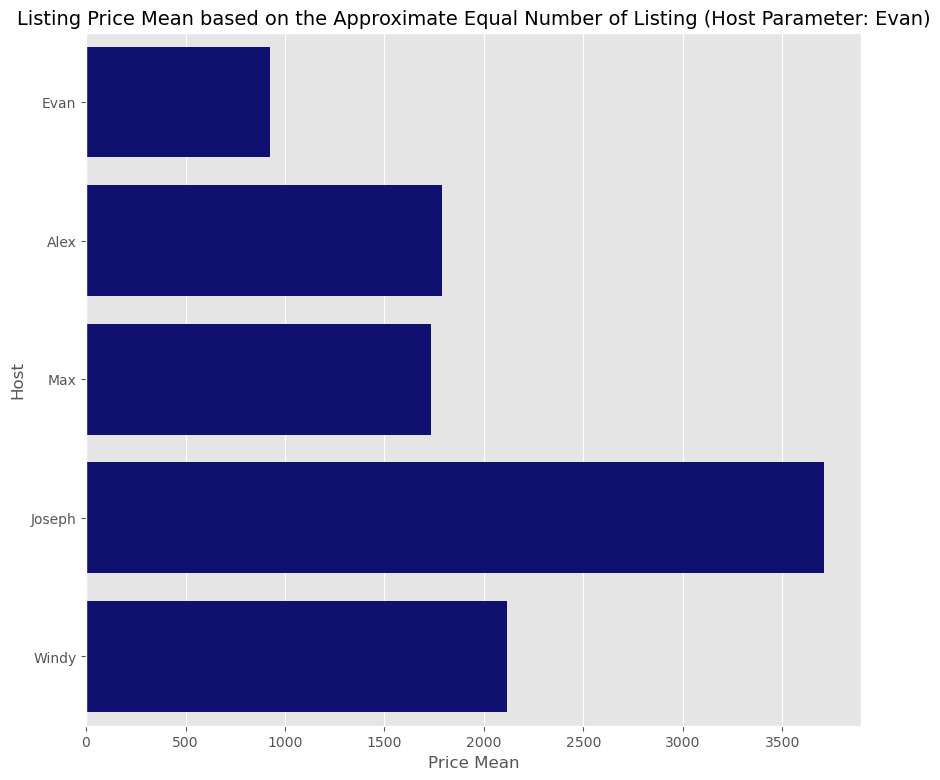

In [72]:
host_of_interest = ['Alex', 'Evan', 'Windy', 'Joseph', 'Max']  
df_filtered = df_BK_new[df_BK_new['host_name'].isin(host_of_interest)]

# Create plot
plt.figure(figsize=(10, 9))
sns.barplot(data=df_filtered, x='price', y='host_name', estimator='mean', errorbar=None, color='navy')
plt.title('Listing Price Mean based on the Approximate Equal Number of Listing (Host Parameter: Evan)', size=14)
plt.xlabel('Price Mean')
plt.ylabel('Host')
plt.show()


- Seperti cara sebelumnya dalam penentuan host yang representatif terhadap host Evan terdiri dari Alex, Max, Patty, Joseph, dan Windy. Seperti yang di visualisasikan dari bar plot di atas, Evan memiliki rata-rata harga listing di bawah 1000 Thai Baht. Ini sangat menarik di karenakan jumlah listing yang lebih dari 30, dan bisa di asumsikan bahwa host Evan merepresentasikan listing yang beroperasi di harga rendah. 

In [75]:
import folium 
import geocoder
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from folium.plugins import HeatMap, MarkerCluster
import matplotlib.pyplot as plt
import warnings

In [74]:
# List unique dari variable 'neighbourhood'
df_BK_new['neighbourhood'].unique()

array(['Ratchathewi', 'Din Daeng', 'Bang Kho laen', 'Rat Burana',
       'Chatu Chak', 'Khlong San', 'Bang Rak', 'Phaya Thai', 'Sathon',
       'Khlong Toei', 'Vadhana', 'Lat Krabang', 'Bangkok Yai',
       'Phasi Charoen', 'Bang Sue', 'Thawi Watthana', 'Parthum Wan',
       'Pra Wet', 'Bang Na', 'Yan na wa', 'Suanluang', 'Dusit',
       'Bang Kapi', 'Phra Khanong', 'Lak Si', 'Phra Nakhon',
       'Samphanthawong', 'Huai Khwang', 'Bueng Kum', 'Nong Chok',
       'Khan Na Yao', 'Saphan Sung', 'Bang Khen', 'Thon buri',
       'Lat Phrao', 'Chom Thong', 'Bangkok Noi', 'Min Buri', 'Bang Phlat',
       'Don Mueang', 'Pom Prap Sattru Phai', 'Thung khru',
       'Wang Thong Lang', 'Khlong Sam Wa', 'Bang Khae', 'Taling Chan',
       'Bang Khun thain', 'Sai Mai', 'Bang Bon', 'Nong Khaem'],
      dtype=object)

In [76]:
district_new = df_BK_new['neighbourhood'].value_counts().head(10)
print(district_new)

neighbourhood
Khlong Toei     1498
Vadhana         1210
Ratchathewi      739
Huai Khwang      686
Sathon           554
Bang Rak         551
Phra Nakhon      374
Phra Khanong     334
Phaya Thai       297
Chatu Chak       280
Name: count, dtype: int64


- Berdasarkan host Themustang dan Evan yang merupakan menjadi bagian perbandingan dalam analysis ini, ada dua wilayah yang di tempati oleh kedua listing tersebut yaitu `Khlong Toei dan Sathon`. Dari data filter berdasarkan variable/column 'neighbourhood' di atas, Khlong Toei menempati posisi atas dengan jumlah listing 1498 yang berkedudukan di wilayah tersebut, sedangkan Sathon menempati posisi 5 dengan jumlah 554.

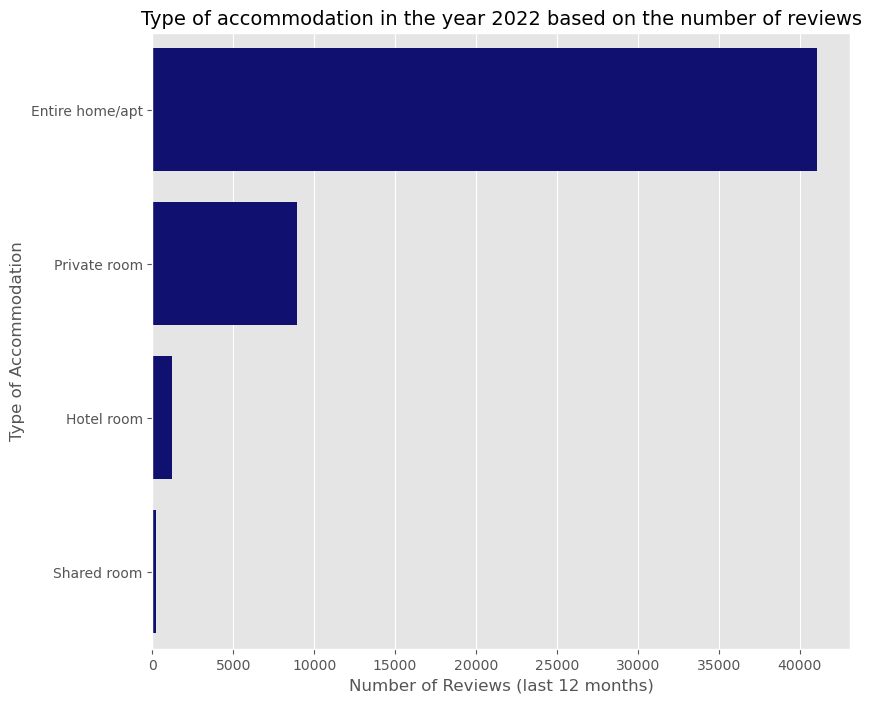

In [77]:
# Create plot
plt.figure(figsize=(9, 8))
sns.barplot(data=df_BK_new, x='number_of_reviews_ltm', y='room_type', estimator='sum', errorbar=None, color='navy')
plt.title('Type of accommodation in the year 2022 based on the number of reviews', size=14)
plt.xlabel('Number of Reviews (last 12 months)')
plt.ylabel('Type of Accommodation')
plt.show()

- Berikut adalah berbagai macem tipe akomodasi dalam tahun 2022, yang berdasarkan jumlah reviews di 12 bulan terakhir. Terlihat bahwa listing yang sangat memiliki banyak jumlah adalah tipe akomodasi entire home/apt. Sedangkan apabila semua total reviews dari private room, hotel room, dan shared room di gabungkan pun tidak bisa menjangkau setengah dari total review entire home/apt. Bar graph ini mengilustrasi kan prefrensi dari pelanggan reviewers ini dalam tahun 2022.  

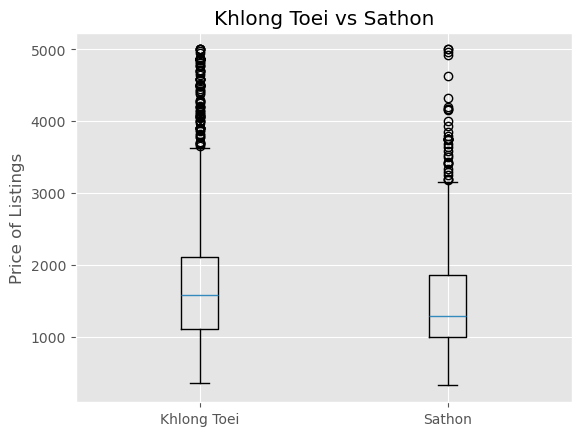

In [78]:
Khlong_Toei = df_BK_new.loc[df_BK_new.neighbourhood == 'Khlong Toei']['price']
Sathon = df_BK_new.loc[df_BK_new.neighbourhood == 'Sathon']['price']

labels = ['Khlong Toei', 'Sathon']

plt.boxplot([Khlong_Toei, Sathon], labels=labels)

plt.title('Khlong Toei vs Sathon')
plt.ylabel('Price of Listings')

plt.show()

- Boxplot merupakan bentuk tools visualisasi yang kuat dalam menunjukkan dua jenis kategori yang berbeda. Seperti terlihat dari boxplot di atas, terdapat perbandingan dari dua wilayah Khlong Toei dan Sathon. Khlong Toei memiliki median harga yang lebih tinggi kira-kira sebesar 1600 di bandingkan, Sathon dengan median sekitar 1300. Range dari harga listing pada wilayah Khlong Toei kurang lebih berada di antara ฿1200 - ฿2200, sedangkan wilayah Sathon kurang lebih berada pada range harga ฿1000 - ฿1800. Titik teratas dari kedua wilayah ini juga termasuk signifikan di mana Khlong Toei memiliki jumlah harga titik atas ฿3600 dan Sathon sebesar ฿3100, maupun begitu Sathon tetap berada dalam kategori harga yang terjangkau di bandingkan Khlong Toei berada di batasan atas kategori yang terjangkau. Jelas sekali bahwa wilayah Khlong Toei memiliki standar harga yang lebih tinggi di banding Sathon, ini didukung juga dengan range persebaran data outliers dari kedua wilayah ini. Di mana dengan wilayah Khlong Toei tidak terdapat penyebaran antar outliers yang sedikit teratur, dan ini mengindikasikan konsistensi dari outliers tersebut. Dimana persebarang outliers wilayah Sathon jauh lebih tidak teratur yang mengindikasikan pattern yang tidak normal dari sistem pricing di wilayah tersebut, di mana untuk wilayah Khlong Toei lebih bervaariasi secara wajar.      

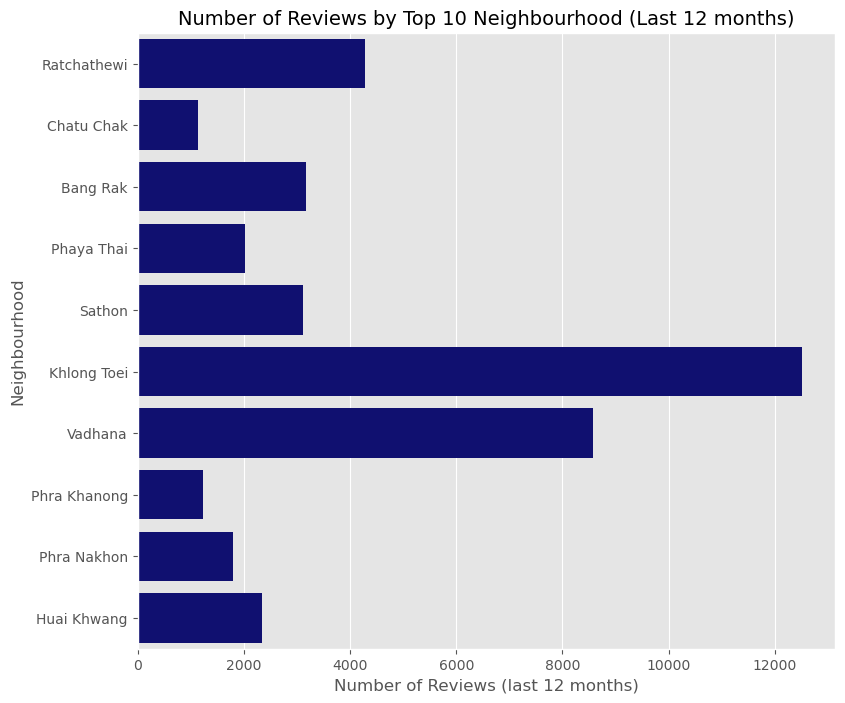

In [79]:
neighbours_of_interest = ['Khlong Toei', 'Vadhana', 'Ratchathewi', 'Huai Khwang', 'Sathon', 'Bang Rak', 'Phra Nakhon', 'Phra Khanong', 'Phaya Thai', 'Chatu Chak']  
df_filtered_neigh = df_BK_new[df_BK_new['neighbourhood'].isin(neighbours_of_interest)]

# Create plot
plt.figure(figsize=(9, 8))
sns.barplot(data=df_filtered_neigh, x='number_of_reviews_ltm', y='neighbourhood', estimator='sum', errorbar=None, color='navy')
plt.title('Number of Reviews by Top 10 Neighbourhood (Last 12 months)', size=14)
plt.xlabel('Number of Reviews (last 12 months)')
plt.ylabel('Neighbourhood')
plt.show()

- Seperti bar plot sebelumnya, grafik ini menunjukkan jumlah review terhadap 10 wilayah yang jumlah listingnya terbanyak. Tetapi ini adalah jumlah review dari 12 bulan terakhirdari awal tahun 2022. Dan seperti sebelumnya Khlong Toei dan Vadhana menempati posisi pertama dan kedua, di mana Khlong Toei tetap konsisten dengan jumlah review nya yang paling banyak. Tetapi ada hasil yang berbeda dari sebelumnya pada posisi ketiga, di mana pada bar plot sebelumnya di duduki oleh wilayah Sathon, tetapi wilayah Ratchathewi yang menempati posisi tersebut dalam waktu 12 bulan terakhir di awal tahun 2022, kurang lebih dari 4200 review berada pada listing di wilayah tersebut.

In [80]:
# Mengcluster/join data neighbourhood, room type, & price 
df_typeroom = df_BK_new[['neighbourhood', 'room_type', 'price']]
df_typeroom.head()

neighbourhood        room_type  price
0    Ratchathewi  Entire home/apt   1905
3      Din Daeng     Private room   1286
5  Bang Kho laen  Entire home/apt   1000
6     Rat Burana     Private room   1558
8     Chatu Chak  Entire home/apt   1558

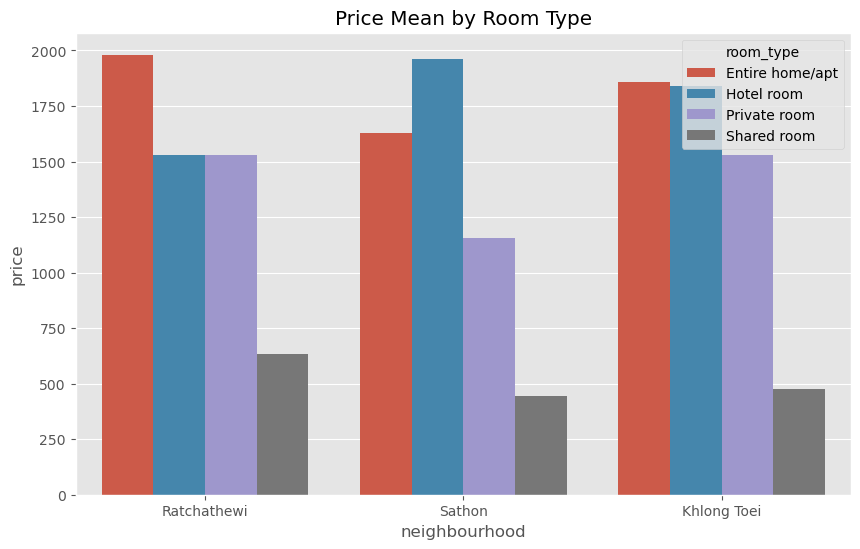

In [81]:
# Specify Neighbourhood
desired_neighbourhood = ['Khlong Toei','Sathon', 'Ratchathewi']

# Filter variable
filtered_typeroom = df_typeroom[df_typeroom['neighbourhood'].isin(desired_neighbourhood)]

# Plot
plt.figure(figsize=(10,6))
plt.title('Price Mean by Room Type')
sns.barplot(x='neighbourhood',y='price',
            data = filtered_typeroom, hue='room_type',
            errorbar=None,
            estimator=np.mean)
plt.show()

- Bar plot di atas ini juga merupakan tools untuk membandingkan tiga wilayah Ratchathewi, Sathon, dan Khlong Toei, tetapi adanya tambahan perbandingan dengan tipe ruangan/bangunan yang berbeda. Dikarenakan wilayah Ratchathewi memasuki posisi ketiga dalam jumlah review terbanyak dalam waktu 12 bulan terakhir, sewajarnya memasuki wilayah ini ke dalam analysis perbandingan. Dari awal ada kemiripan dari tiga wilayah ini yaitu di mana shared room untuk ketiganya memiliki rata-rata di bawah ฿700. Dari analysis sebelumnya telah di explorasi bahwa wilayah Sathon memiliki nilai harga yang lebih rendah di bandingkan Khlong Toei, dan memang benar apabila di tipe bangunan private room dan entire home/apt Khlong Toei memiliki rata-rata harga yang secara sinifikan lebih tinggi. Namun Ratchathewi memiliki rata-rata harga listing yang lebih tinggi untuk entire home/apt di bandingkan Khlong Toei, akan tetapi memiliki rata-rata yang sama untuk private home. Tetapi Sathon memiliki rata-rata harga lebih tinggi pada tipe hotel room di bandingkan dengan Khlong Toei dan Ratchathewi dengan jumlah sekitar ฿1900. Ini bisa di sebabkan oleh lebih banyak quantitas tipe hotel room pada wilayah Khlong Toei dan Ratchathewi yang menyebabkan rata-rata menurun semakin banyak quantitas dari hotel room tersebut.   

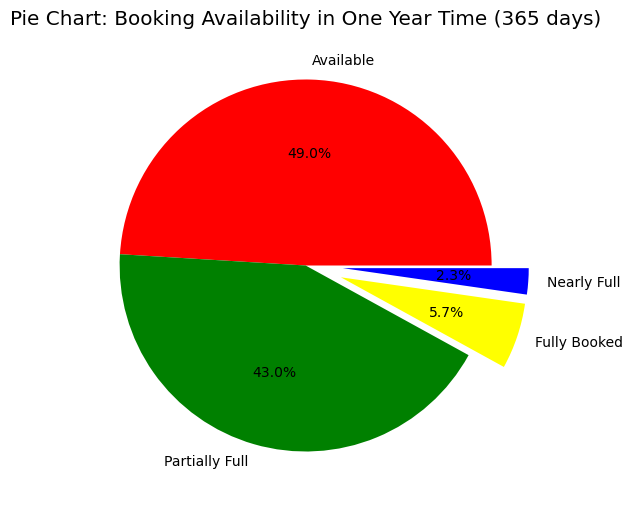

In [82]:
typee = df_BK_new["yearly_book"].value_counts()
plt.figure(figsize=(6, 8))
explode = (0,0,0.2,0.2)
typee.plot.pie(autopct="%1.1f%%", colors=["red", "green", "yellow", "blue"], explode = explode)
plt.title("Pie Chart: Booking Availability in One Year Time (365 days)")
plt.ylabel("") 
plt.show()

- Melanjutkan konteks exploratory data pada 12 bulan terakhir di awal tahun 2022, berikut adalah pie chart yang menggambarkan status occupancy dari seluruh listing yang ada di Bangkok. Dari yang fully booked terdapat dalam 5.7 % dari seluruh listing, dan diikuti oleh 2.3 % listing yang hampir fully booked. Tetapi masi banyak listing yang belum sama sekali di booking pada 12 bulan terakhir/365 hari, sedikit di bawah 50 % data dengan 49 % dari seluruh proporsi listing. Tetapi 'partially full' hampir mengimbangi dari kategori 'Available' dengan 43%.  

In [83]:
# Data Preperasi Geojson
# df_neighbor = df_BK_new[['neighbourhood', 'price']]
df_neighbor_mean = df_BK_new.groupby('neighbourhood', as_index=False)['price'].mean()
df_neighbor_mean.head()

neighbourhood        price
0       Bang Bon  1200.000000
1      Bang Kapi  1050.809524
2      Bang Khae   883.545455
3      Bang Khen  1151.886792
4  Bang Kho laen  1396.166667

In [84]:
# Inisialisasi GeoJson
bangkok = r'Bangkok-districts.geojson'
bangkok_location = [13.7563, 100.5018]

bangkok_map = folium.Map(location = bangkok_location, zoom_start=12)

# Add Marker
## Wat Phra Chetuphon
folium.Marker([13.7464, 100.4928],
              popup = "Wat Phra Chetuphon",
              tooltip = "No.1 tourist spot").add_to(bangkok_map)
## Chatuchak Weekend Market
folium.Marker([13.7998, 100.5504],
              popup = "Chatuchak Market",
              tooltip = "No.2 tourist spot").add_to(bangkok_map)
## Siam Paragon
folium.Marker([13.7458, 100.5344],
              popup = "Siam Paragon Shopping Mall",
              tooltip = "No.3 tourist spot").add_to(bangkok_map)
## Temple of Dawn
folium.Marker([13.7439, 100.4884],
              popup = "Temple of Dawn",
              tooltip = "No.4 tourist spot").add_to(bangkok_map)
## The Grand Palace
folium.Marker([13.7499, 100.4916],
              popup = "Grand Palace",
              tooltip = "No.5 tourist spot").add_to(bangkok_map)

# Sathon
folium.CircleMarker([13.7150, 100.5335],
                    radius = 10,
                    popup = 'Sathon',
                    tooltip = 'Sathon',
                    color = 'Blue',
                    ).add_to(bangkok_map)
# Khlong Toei
folium.CircleMarker([13.7189, 100.5672],
                    radius = 10,
                    popup = 'Sathon',
                    tooltip = 'Sathon',
                    color = 'Orange',
                    ).add_to(bangkok_map)
# Ratchatewi
folium.CircleMarker([13.7580, 100.5345],
                    radius = 14,
                    popup = 'Ratchatewi',
                    tooltip = 'Ratchatewi',
                    color = 'Green',
                    ).add_to(bangkok_map)
# Bang Nam Phueng Floating Market
folium.CircleMarker([13.6797, 100.5737],
                    radius = 10,
                    popup = 'Bang Nam Flot. Market',
                    tooltip = 'Bang Nam Flot. Market',
                    color = 'Black',
                    ).add_to(bangkok_map)



# Chloropleth Map
folium.Choropleth(geo_data = bangkok,
                  data = df_neighbor_mean,
                  columns = ['neighbourhood', 'price'],
                  key_on = 'feature.properties.dname_e',
                  fill_color = 'YlGn',
                  fill_opacity = 0.7,
                  line_opacity = 0.2,
                  legend_name = 'Price Mean by Neighborhood'
                  ).add_to(bangkok_map)

labels_layer = folium.GeoJson(
    bangkok,
    name='labels',
    style_function=lambda feature: {
        'color': 'transparent',
        'fillColor': 'transparent',
        'weight': 0,
        'opacity': 0,
        'fillOpacity': 0,
        'text': feature['properties']['dname_e'],  # Get the name of the block as the label text
        'text_font': 'Arial',  # Set the font family for the label text
        'text_size': 10,  # Set the font size for the label text
        'text_anchor': 'middle',  # Set the text anchor to the middle of the label
    }, # Kode style ini optional
    highlight_function=lambda x: {'weight': 1, 'color': 'black'},  # Add a highlight effect on mouseover
    tooltip=folium.features.GeoJsonTooltip(fields=['dname_e'], aliases=['neighbourhood']),
).add_to(bangkok_map)

bangkok_map


Legend: 
- `Black Marker`= Bang Nam Pheung Floating Market (Salah Satu floating market di Bangkok yang berada di Bangkok dan satu-satu nya yang berada di central Bangkok).
- `Orange Marker`= Wilayah Khlong Toei
- `Blue Marker`= Wilayah Sathon
- `Green Marker`= Wilayah Ratchatewi
- `Blue Point Marker`= Merepresentasikan top 5 lokasi tourist yang ada di Bangkok.  

Note: Parthum Wan di akui sebagai central dari Bangkok, lokasinya terletak di persis selatan dari wilayah Ratchatewi. 

Berikut adalah Chloropleth map Bangkok di mana memiliki suatu nuansa yang menggunakan rata-rata price untuk tiap neighbourhood/wilayah, yang di representasikan irisan warna hijau yang berbeda di mana semakin gelap mencerminkan semakin mahal kumpulan listing di daerah tersebut. Bagian analysis ini akan menggunakan 2 bagian analysis, findings dan interpretation. 

Findings:
- Wilayah Sathon memiliki rata-rata harga listing di dalam range ฿1257 - ฿1635. 
- Wilayah Khlong Toei memiliki rata-rata harga listing di dalam range ฿1635 - ฿2014.
- Wilayah Ratchatewi memiliki rata-rata harga listing di dalam range ฿1635 - ฿2014. 
- Wilayah Khlong Toei dan Sathon lebih mendekati Bang Nam Pheung floating market di bandingkan wilayah tourist lainnya, di mana yang paling terdekat berada di dekat daerah Ratchatewi yaitu Siam Paragon Shopping Mall. 

Interpretation: 
- Dari yang telah di asumsi melalui salah satu metode perbandingan antara wilayah Khlong Toei dan Sathon yang berupa boxplot, bahwa kedua wilayah ini memiliki nilai harga yang berbeda secara signifikan. Tetapi melalui Map di atas, range mean dari kedua wilayah tersebut lebih mirip dari asumsi awalnya. 
- Wilayah Khlong Toei dan Sathon berposisi di wilayah yang cukup strategis di mana berjarak pada wisata tourist yang relatif dekat, seperti Bang Nam Floating Market dan Siam Paragon Shopping Mall.
- Menurut Willy Thuan salah satu penulis dari artikel '6 Floating Markets Around Bangkok' pada situs id.hotels mengatakan bahwa walawpun Bang Nam floating market berada di central Bangkok, akses pada Bang Nam tidak mudah/nyaman untuk di kunjungi, bahkan floating market tersebut hanya memiliki 6 perahu yang tidak seperti standar floating market yang lainnya. Meskipun sebagai berikut, Khlong Toei tetap memiliki peminatnya, dimana dari 2022 wilayah tersebut memiliki review yang paling banyak di bandingkan wilayah lainnya. Bisa di asumsikan alesan kenapa bisa seperti demikian karena mungkin dengan harga yang terjangkau bisa menyediakan fasilitas yang cukup memuaskan, atau memang posisi walayah yang relatif dekat dengan bandara tidak seperti wilayah Sathon. 
- Dari data jumlah reviewer pada waktu 12 bulan terakhir di tahun 2022, wilayah Ratchatwei menempati posisi ketiga di mana dari total data sebelum tahun 2022 posisi itu di raih oleh wilayah Sathon. Berdasarkan map di atas wilayah tersebut mempunyai kesamaan dalam rata-rata harga lisiting seperti wilayah Khlong Toei, tetapi Ratchatwei sangat dekat dengan 4 tourist spot terpopuler di Bangkok (menurut Tripadvisor) yang salah satunya merupakan shopping mall terkenal. Bahkan Ratchatwei dekat dengan stasiun skytrain yang memiliki ruto connector ke bandara Suvarnabhumi. Dua aspek ini kemungkinan merupakan atribut atau aspek dari wilayah Ratchatwei yang menarik perhatian reviewers di tahun 2022.       


https://id.hotels.com/go/thailand/bangkok-floating-markets

https://www.tripadvisor.com/Attractions-g293916-Activities-Bangkok.html

## Analysis 5: Relationship Analysis between Variables

**Bagian ini akan dilakukannya investigasi menggunakan tools seperti correlation matrix heatmap, scatter plot untuk memahami dan memastikan apakah adanya hubungan dari beberapa variable yang memiliki korelasi yang positif**

Note: Di karenakan outliers merupakan salah satu aspek yang signifikan dalam EDA ini, tidak akan dilakukannya dropping outliers secara lanjut. 

In [85]:
df_BK_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9420 entries, 0 to 15796
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      9420 non-null   int64         
 1   id                              9420 non-null   int64         
 2   name                            9420 non-null   object        
 3   host_id                         9420 non-null   int64         
 4   host_name                       9420 non-null   object        
 5   neighbourhood                   9420 non-null   object        
 6   latitude                        9420 non-null   float64       
 7   longitude                       9420 non-null   float64       
 8   room_type                       9420 non-null   object        
 9   price                           9420 non-null   int64         
 10  minimum_nights                  9420 non-null   int64         
 11  number_o

Heatmap and scatterplot

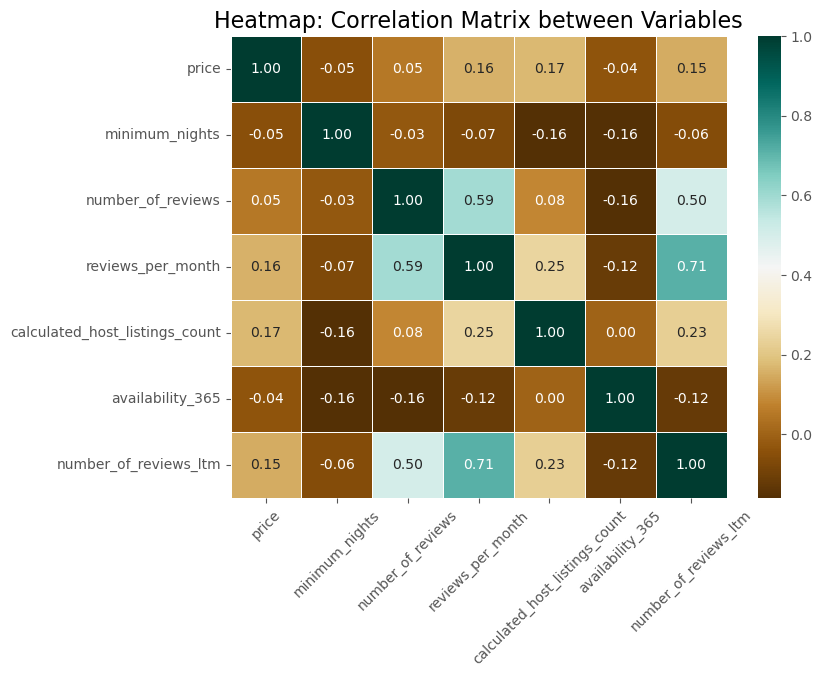

In [86]:
correlation_matrix = df_BK_new[['price', 'minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="BrBG", linewidths=0.5)

# Tambahkan judul
plt.title("Heatmap: Correlation Matrix between Variables", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


Berdasarkan Heatmap correlation matrix berikut, tidak adanya korelasi antara variable yang berada di atas 75%. Untuk mempersiapkan kemungkinan di tindak lanjut berikutnya yang berupa modeling atau regressi, akan di tentukannya general rule berupa: 

`General rule: A Positive Correlation di mana apabila correlation coefficient lebih dari nol (0) ini mengindikasikan kedua variable bergerak ke pada satu arah positif bersama.`  

Atas dasar general rule ini, akan ada dilakukan investigasi hubungan antara 2 variable sebanyak 8 kali yaitu: 
- 0.71 = reviews_per_month with number_of_reviews_ltm
- 0.59 = reviews_per_month with number_of_reviews 
- 0.50 = number_of_reviews_ltm with number_of_reviews
- 0.25 = reviews_per_month with calculated_host_listings_count 
- 0.23 = number_of_reviews_ltm with calculated_host_listings_count 
- 0.17 = price with calculated_host_listings_count 
- 0.16 = price with reviews_per_month 
- 0.15 = price with number_of_reviews_ltm 

1. Hubungan antara jumlah review dalam waktu 12 bulan terakhir dengan rate review perbulan

<Axes: title={'center': 'Hubungan antara Jumlah pinjaman vs Jumlah peminjam'}, xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

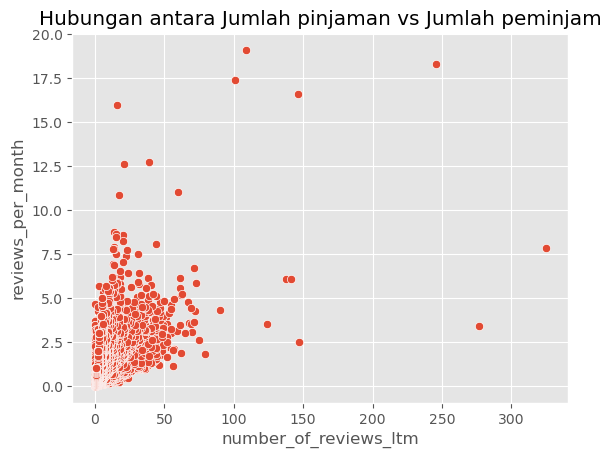

In [87]:
my_pallate = ['#37306B', '#D27685']
sns.color_palette(my_pallate)

plt.title('Hubungan antara Jumlah pinjaman vs Jumlah peminjam')
sns.scatterplot(data=df_BK_new, 
                y='reviews_per_month', 
                x='number_of_reviews_ltm', 
                palette=my_pallate)

In [88]:
min_reviews_ltm = df_BK_new['number_of_reviews_ltm'].min()
min_reviews_ltm

0

Berdasarkan scatter plot ini kebanyakan data nya tersentralisasi kira-kira pada review perbulan yang kurang dari 5 dan lisiting yang memiliki total review kurang dari 50 dalam waktu 12 bulan terakhir. Dalam data yang paling bercluster ini tidak ada hubungan dengan asumsi semakin tinggi jumlah review pada listing di waktu 12 bulan terakhir, semakin tinggi juga rate of review per bulan. Terlihat adanya hubungan di mana makin banyaknya jumlah review dalam waktu 12 bulan terakhir (2022) semakin naiknya juga rate review perbulan. Tetapi ada juga listing yang tidak memiliki jumlah review dalam waktu 12 bulan terakhir (2022), tetapi ada masuknya review perbulan. Ini kemungkinan terjadi dengan hubungan di mana rate review per bulan telah terjadi di sebelum tahun 2022, review perbulan itu tidak menjamin adanya masuk review pada tahun 2022. 

2. Hubungan antara jumlah review pada lisitng dengan rate review per bulan

<Axes: title={'center': 'Hubungan antara Jumlah pinjaman vs Jumlah peminjam'}, xlabel='reviews_per_month', ylabel='number_of_reviews'>

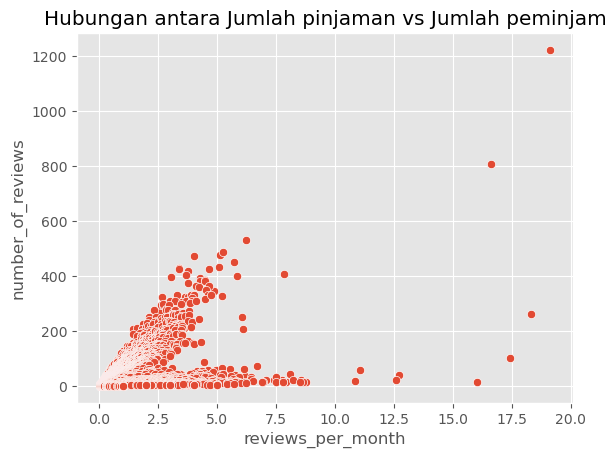

In [89]:
my_pallate = ['#37306B', '#D27685']
sns.color_palette(my_pallate)

plt.title('Hubungan antara Jumlah pinjaman vs Jumlah peminjam')
sns.scatterplot(data=df_BK_new, 
                y='number_of_reviews', 
                x='reviews_per_month', 
                palette=my_pallate)

In [90]:
min_reviews = df_BK_new['number_of_reviews'].min()
min_reviews

1

Berdasarkan scatter plot ini terjadinya duality dari korelasi, di mana ini menunjukkan bahwa adanya hubungan sebagaimana semakin tinggi jumlah review yang di miliki listing yang bersangkutan, semakin tinggi juga rate review perbulan mereka. Tetapi ada juga terjadinya peningkatan secara gradual/perlahan di mana jumlah total review dari listing berkuantitas sekecil angka 1 tetapi mengalami peningkatan rate perbulan. Atau juga bisa di asumsikan mereka mendapatkan satu review ini dari tahun-tahun sebelumnya sehingga ada yang mendapatkan rate review yang mungkin berada di bawah 1. 

3. Hubungan antra jumlah reviews dengan jumlah reviews di waktu 12 bulan terakhir

<Axes: title={'center': 'Hubungan antara Jumlah pinjaman vs Jumlah peminjam'}, xlabel='number_of_reviews', ylabel='number_of_reviews_ltm'>

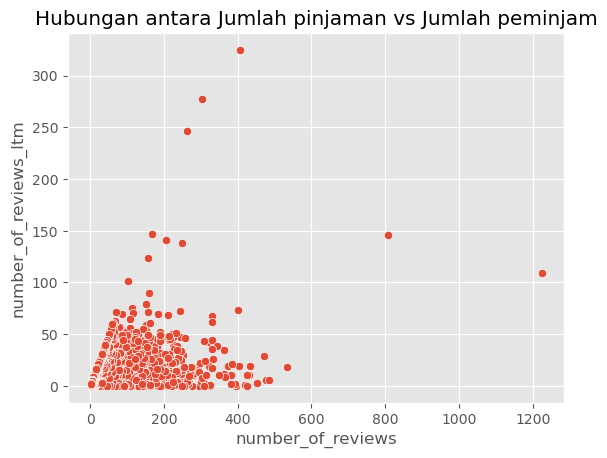

In [91]:
my_pallate = ['#37306B', '#D27685']
sns.color_palette(my_pallate)

plt.title('Hubungan antara Jumlah pinjaman vs Jumlah peminjam')
sns.scatterplot(data=df_BK_new, 
                y='number_of_reviews_ltm', 
                x='number_of_reviews', 
                palette=my_pallate)

Bisa di lihat dengan scatter plot di atas bahwa adanya korelasi di mana setiap jumlah reviews secara keseluruhan naik, reviews dalam waktu 12 bulang terakhir (2022) juga mengalami peningkatan, dan ini mencerminkan adanya kepekaan dari pelanggan terhadap reviews di mana bisa menjadi alasan buat mereka untuk meninggalkan review. Teatapi ada juga iterasi lain dimana walaupun jumlah review dalam waktu 12 tahun terakhir bernominal 0, bukan berarti listing tidak mempunyai review sama sekali. Dan cukup banyak listing yang berada dalam ketegori ini, di mana listing ini belom mendapatkan retention pelanggan yang cukup memuaskan pada tahun 2022. 

4. Hubungan antara review rate perbulan dengan jumlah listing yang dimiliki oleh host

<Axes: title={'center': 'Hubungan antara Jumlah pinjaman vs Jumlah peminjam'}, xlabel='reviews_per_month', ylabel='calculated_host_listings_count'>

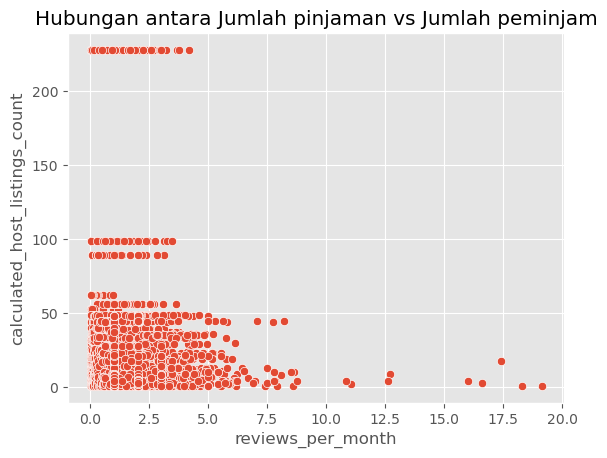

In [92]:
my_pallate = ['#37306B', '#D27685']
sns.color_palette(my_pallate)

plt.title('Hubungan antara Jumlah pinjaman vs Jumlah peminjam')
sns.scatterplot(data=df_BK_new, 
                y='calculated_host_listings_count', 
                x='reviews_per_month', 
                palette=my_pallate)

In [93]:
min_reviews_permonth = df_BK_new['reviews_per_month'].min()
min_reviews_permonth
 
min_reviews_listcount = df_BK_new['calculated_host_listings_count'].min()
min_reviews_listcount

1

Yang terlihat dari scatter plot di atas terlihat bahwa rate review perbulan dari range kurang lebih 0.0 - 4.0 memiliki 3 titik outlier yang berupa pattern yaitu di titik host yang memiliki listing kurang lebih 80, 100, dan 240. Di sini sangat representatif gimana semakin banyaknya host memiliki jumlah listing, semakin sedikit jumlah rating reviews perbulan mereka di karenakan review yang mereka miliki tersebar lebih banyak ke beberapa listing mereka dan mengakibatkan semakin kecilnya nominal rating reviews perbulan. Beda dengan outliers yang memiliki jumlah rating reviews perbulan lebih dari 10, di mana jumlah listing pada host tersebut tidak lebih dari 20. Dan titik-titik outliers ini bisa di miliki oleh nama host yang sama. 

5. Hubungan antara jumlah review dalam waktu 12 bulan terakhir (2022) dengan jumlah listing yang dimiliki oleh host

<Axes: title={'center': 'Hubungan antara Jumlah pinjaman vs Jumlah peminjam'}, xlabel='number_of_reviews_ltm', ylabel='calculated_host_listings_count'>

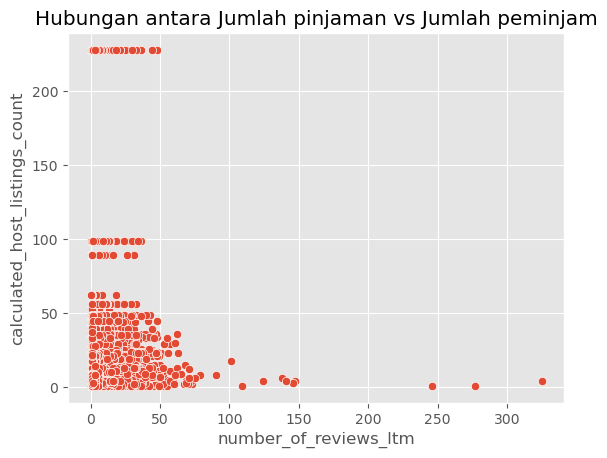

In [94]:
my_pallate = ['#37306B', '#D27685']
sns.color_palette(my_pallate)

plt.title('Hubungan antara Jumlah pinjaman vs Jumlah peminjam')
sns.scatterplot(data=df_BK_new, 
                y='calculated_host_listings_count', 
                x='number_of_reviews_ltm', 
                palette=my_pallate)

In [95]:
min_reviews_ltm = df_BK_new['number_of_reviews_ltm'].min()
min_reviews_ltm

0

Scatter plot di atas ini terlihat memiliki pattern yang sangat mirip dengan scatter plot sebelumnya, yaitu outliers pada jumlah listing yang kemungkinan di miliki oleh host yang sama, berada pada jumlah 80, 100, dan 240. Jumlah listing seperti ini memiliki jumlah review dalam 12 bulan terakhir (2022) di range 0 - 50 dan tidak lebih dari itu. Ini juga bisa di interpretasi gimana ada hubungannya dengan 'terkenal' nya di kalangan reviewers, dalam arti semakin banyak lisiting yang di miliki oleh host,semakin tidak adanya rasa familiar atau di kenalnya hosting itu di kalangan reviewers. Beda hal dengan host yang memiliki listing yang relatif sedikit, terlebih dahulu mereka ankan mengingat listing atau gedung tersebut dan mereka akan mengingat lebih jelas asosiasi dari gedung tersebut yaitu host yang terkait, sehingga akan menimbulkan rasa familiarity atau keakraban terhadap host tersebut.  

6. Hubungan antara harga listing dengan jumlah listing yang dimiliki oleh host

<Axes: title={'center': 'Hubungan antara Jumlah pinjaman vs Jumlah peminjam'}, xlabel='price', ylabel='calculated_host_listings_count'>

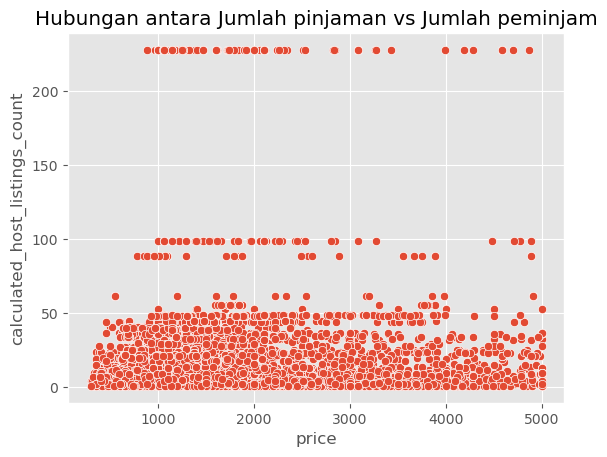

In [96]:
my_pallate = ['#37306B', '#D27685']
sns.color_palette(my_pallate)

plt.title('Hubungan antara Jumlah pinjaman vs Jumlah peminjam')
sns.scatterplot(data=df_BK_new, 
                y='calculated_host_listings_count', 
                x='price', 
                palette=my_pallate)

Pada scatter plot ini tidak di temukannya banyak ruang buat interpretasi di karenakan mirip seperti plot sebelumnya yang dapat di asumsikan bahwa titik-titik outliers ini bisa di miliki oleh nama host yang sama. Dan bentuk scatter plot ini lebih menyoroti range harga listing kemungkinan dari 1 host ini yang memiliki unit/listing kurang lebih sebanyak 240, 100, dan 80.  

7. Hubungan antara harga listing dengan rate reviews perbulan

<Axes: title={'center': 'Hubungan antara Jumlah pinjaman vs Jumlah peminjam'}, xlabel='price', ylabel='reviews_per_month'>

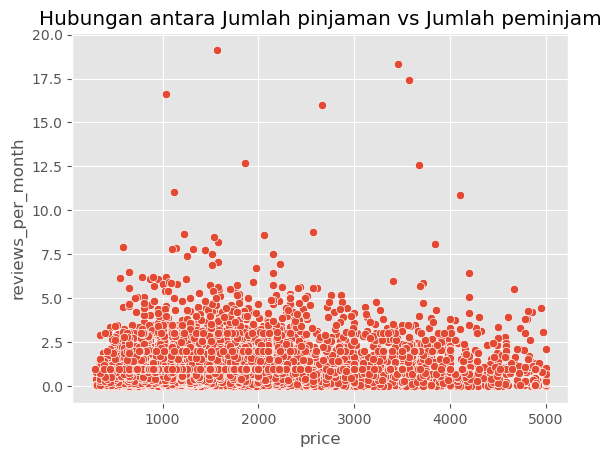

In [97]:
my_pallate = ['#37306B', '#D27685']
sns.color_palette(my_pallate)

plt.title('Hubungan antara Jumlah pinjaman vs Jumlah peminjam')
sns.scatterplot(data=df_BK_new, 
                y='reviews_per_month', 
                x='price', 
                palette=my_pallate)

Melihat scatter plot ini, tidak ditemukannya ada korelasi yang dapat di interpretasikan. Walaupun rate reviews perbulan rendah, tidak ada pengaruh ke harga listing. 

8. Hubungan antara harga dan jumlah reviews ddalam waktu 12 bulan terakhir (2022)

<Axes: title={'center': 'Hubungan antara Jumlah pinjaman vs Jumlah peminjam'}, xlabel='price', ylabel='number_of_reviews_ltm'>

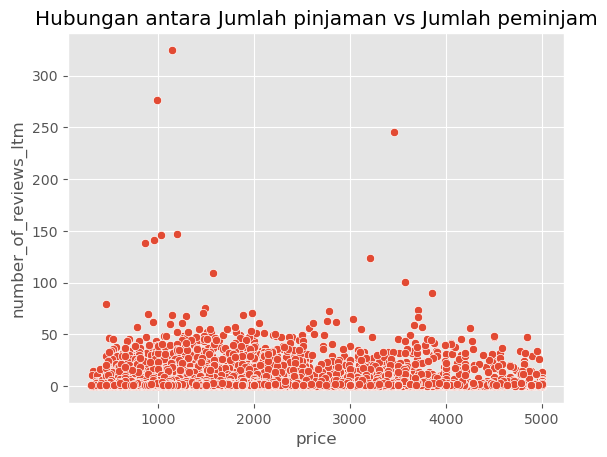

In [98]:
my_pallate = ['#37306B', '#D27685']
sns.color_palette(my_pallate)

plt.title('Hubungan antara Jumlah pinjaman vs Jumlah peminjam')
sns.scatterplot(data=df_BK_new, 
                y='number_of_reviews_ltm', 
                x='price', 
                palette=my_pallate)

Berdasarkan grafik scatter plot ini, tidak adanya di temukan hubungan yang signifikan antar harga dan jumlah review dalam waktu 12 bulan terakhir (2022). Rendah atau tingginya review yang di dapatkan oleh listing dalam waktu 12 bulan terakhir tidak berpengaruh kepada harga listing. 

# Conclusion

**Findings**

`Analysis 1`: 
- Pada analysis tersebut telah di highlight bahwa wilayah Phra Nakhon memiliki nilai yang relatif rendah. 
- Menurut peta chloroplath dari analysis 4 wilayah tersebut merupakan wilayah yang memiliki rata-rata harga yang cukup menengan antara ฿1257 - ฿1635 dan bahkan berada di area dimana terdapat 3 candi terkenal. 
- Berdasarkan ini, host Pornchai memang ingin menggasak market daerah tersebut dengan memasang harga yang sangat murah di bandingkan standar harga pada wilayah tersebut. 


`Analysis 2`: 
- Telah di selidiki pada analysis ini bahwa extreme outliers memiliki range yang sangat lebar, di mana maximal dari harga listing di Bangkok bernilai ฿11000 dan sedangkan upperbound dari seluruh data airbnb Bangkok bernilai ฿4722.5, selain itu keseluruhan dari extreme outliers tersebut mencakup kurang lebih 8% dari seluruh dataframe. 
- Wilayah Vadhana & Khlong Toei terbukti menjadi kontributor terbanyak terhadap listing yang berharga extreme tersebut. Tipe bangunan/listing yang terdiri atas harga listing extreme ini adalah berupa Entire home/apt diikuti oleh Private Room. Sebanyak 926 listing yang berharga lebih dari ฿4800 tidak memiliki review pada 12 bulan terakhir (2022). 


`Analysis 3`: 
- Setelah terjadinya transformasi dataframe melalui pembersihan NaN values dan penurunan outliers, terlihat bahwa median dari harga listing ini menjadi ฿1300. 
- Dan dalam variable jumlah listing yang di miliki oleh host (number_of_reviews_ltm) memiliki median 6 di mana sebelumnya memiliki media 4, ini kemungkinan disebabkan oleh listing yang tidak memiliki review, yang secara umum memiliki jumlah listing yang sedikit. 


`Analysis 4`: 
- Bangkok sebagai kota tourist yang cukup terkenal secara wajar di dominasi oleh listing yang memiliki short term stay dengan persentase 95.5%. 
- Melalui trend line, telah di diketahui bahwa reviews pada listing tahun menuju 2022 mengalami peningkatan yang signifikan, dan juga di mana listing yang memiliki reviews dalam cluster keterjangkauan 'murah' dan 'mahal' tidak memiliki gap yang signifikan. Dimana pada cluster 'terjangkau/affordable' terkumpulnya range harga listing dari ฿900 - ฿2100. 
- Dua wilayah yang memiliki jumlah review terbanyak adalah Khlong Toei dan Vadhana, diikuti oleh wilayah Sathon. Berbeda dengan wilayah Sathon, kira-kira di atas harga ฿3600 dari Khlong Toei, wilayah itu memiliki range harga yang konsisten, berbeda dengan Sathon pada harga listing lebih dari ฿1800 yang meiliki variasi harga yang jauh dari satu titk harga dengan yang lain. 
- Dari perbandingan wilayah Khlong Toei dan Sathon, shared room memiliki rata-rata harga terrendah dengan harga di bawah ฿500. Menariknya wilayah Sathon memiliki rata-rata harga listing pada hotel room lebih tinggi di bandingkan Khlong Toei dengan perbedaan harga kira-kira ฿125, walaupun untuk private room dan entire home/apt wilayah Khlong Toei memiliki harga jauh lebih tinggi di bandingkan Sathon. 
- Dalam 12 bulan terakhir pada tahun 2022 wilayah Ratchatewi mendapatkan total jumlah review dari listing lebih dari 4000, menempati posisi ketiga berdasarkan wilayah yang memiliki banyak quantitas lisitng di Bangkok. 
- Ketiga wilayah yang sering di sebut dalam analysis sebelumnya yaitu Khlong Toei, Sathon, dan Ratchatewi merupakan daerah-daerah yang strategis di karenakan dekatnya terhadap central dari kota Bangkok, dengan attribut-attribut yang unggul di bandingkan neighbourhood/region yang lain.     


`Analysis 5`: 
- Pada relationship analysis ini, terdapat hubungan antara review per bulan dengan total review dalam tahun 2022 memiliki centralisasi data pada minimal 5 review perbulan dan sekitar 50 jumlah review dalam 12 bulan terakhir. 
- Beberapa listing yang memilki jumlah listing lebih dari 200 hanya memiliki jumlah review dalam waktu 12 bulan terakhir kira-kira sebanyak 50 reviews, berbeda di mana outliers lain lain memiliki banyak review minimal lebih dari 150 tetapi memiliki jumlah listing yang minimal kurang dari 30. 
- Hubungan jumlah reviews dan jumlah reviews dalam waktu 12 bulan terakhir juga memiliki korelasi yang positif, walaupun sebaliknya di mana sesedikitnya angka 0 dengan reviews dalam waktu 12 bulan terakhir, variable jumlah total review tetap bertambah. 
- Dari 3 scatterplot yang menjadikan price sebagai pengukur apakah variable tersebut merupakan predictor yang kuat, tidak satupun variable dari jumlah review, review perbulan, dan jumlah listing pada host memiliki korelasi yang kuat terhadap price. 

**Additional Findings from Tableau**

- Dari 2nd dashboard dalam Tableau beardasarkan heatmap dari jumlah review 2016 - 2022 dari tipe ruangan/listing, terdapat pattern seasonal di mana untuk entire home/apt memiliki dua jumlah review paling tinggi. Seasonal pattern ini terjadi di tahun 2022 bulan November dan December, di mana pada bulan November jumlah reviews mencapai 30226 sedangkan bulan December dengan 97535 yang merupakan peningkatan 3 kali lipat dari 2 bulan November ke December. Beda dari tipe ruangan private room hanya memilki satu seasonal pattern pada bulan December 2022 dengan jumlah review 23191. Seasonal pattern pada listing airbnb di Bangkok ini baru saja berpristiwa hanya pada tahun 2022. 

- Pada 2nd dashboard dalam Tableau terdapat trend dari reviews yang di bagi menjadi room type. Terlihat bahwa tipe entire home/apt dan private room keduanya mengalami perkembangan yang signifikan sejak tahun 2021, walaupun perbedaan dalam perkembangan itu kurang lebih sebesar 3000 untuk entire home/apt.

- Pada 3rd dashboard yang ditambilkan berjenis map, terdapat neighbourhood yang berpotensi sebagai pilihan ideal yang tidak dapat di lihat melalui grafik di visual code. Map ini terbagi atas tiga variable yaitu, total jumlah reviews, reviews perbulan, dan reviews dalam waktu 12 bulan terakhir. Pada jumlah reviews selain wilayah yang telah di identifikasi sebagai wilayah yang memiliki jumlah review besar, neighbourhood Phay Thai, Huai Khwang, Bang Rak memiliki reviews di atas 10000. Dengan Phay Thai dan Huai Khwang sepertinya berada di posisi jauh dari central Bangkok (Siam Square). Buat map yang menampilkan reviews perbulan, wilayah yang jarang termention adalah Phra Nakhon di mana wilayah ini memiliki 313 reviews perbulan. Phra Nakhon menurut Chloropleth map sebelumnya memiliki range harga ฿1257 - ฿1635, dan wilayah ini terletak berdekatan dengan tiga candi yang merupakan destinasi populer bagi tourist. Map yang terakhir berupa penampilan reviews 12 bulan terakhir, menunjukkan bahwa wilayah Ratchathewi, Vadhana, Khlong Toei, Sathon, Bang Rak merupakan wilayah yang ideal dikarenakan dari semua aspek jenis reviews secara berulang kali memiliki angka reviews yang signifikan. 

- Pada 4th dashboard menampilkan perbandingan antara 5 wilayah yang berpotensi sebagai neighbourhood yang ideal, menggunakan bar plot, stack bar, dan box-plot. Dari tipe lodging private room kelima wilayah tersebut memiliki rata-rata harga yang mirip tetapi Sathon merupakan wilayah yang memiliki rata-rata harga terrendah dari tipe private room. Sedangkan untuk entire room/apt, Bang Rak merepresentasikan rata-rata harga tertinggi dan Sathon merepresentasikan rata-rata harga terrendah. 

- Melanjutkan pada perbandingan berjenis stack bar, proporsi dari tiap neighbourhood terbagi atas 3 price grouping yaitu affordable, cheap, dan expensive. Menurut bar plot ini wilayah Sathon merupakan wilayah yang terdiri dari listing yang berhaga terjangkau terbesar dengan proporsi 61.19 %, sedangkan wilayah Bang Rak terdiri dari listing yang berharga terjangkau paling sedikit dengan proporsi 50.82 %. Wilayah Sathon juga memiliki persentase tertinggi dalam tipe pricing murah dengan persentase 20.58 %, sedangkan Vadhana memiliki persentase terkecil dari pricing murah dengan proporsi 10.91 %. Untuk jenis pricing mahal, wilayah Vadhana dan Bang Rak memiliki propoprsi yang mirip dengan persentase 36.86 % dan 35.03 %. 

- Dari perbandingan box-plot terlihat bahwa wilayah Bang Rak tidak memiliki outliers, di mana dapat di interpretasi bahwa wilayah ini adalah wilayah yang berada di market atas dengan range price yang konsisten dan terlihat dari median yang lebih besar di bandingkan 4 wilayah yang lain. Dari semua outliers, wilayah Sathon memiliki range outliers yang tidak konsisten di man ini dapat menyebabkan susah melabel apakah wilayah ini berada pada cluster upper market atau lower market, walawpun Sathon memiliki median yang rendah di bandingkan wilayah yang lain.  

**Praktis kah memasuki market Airbnb Bangkok?**

Pros: 
- Trend peningkatan masuknya review terhadap listing di Bangkok menuju tahun 2022, di mana ini menunjukkan bahwa masi adanya antusias di kalangan customer untuk meninggalkan review dan ini dapat membantu performa bisnis, terutama pada tahap awal beroperasi. 
- Memiliki banyak opsi untuk menerapkan harga untuk listing, di karenakan luasnya range yang di miliki parameter 'affordable' saat transformasi data, yang di olah berdasar kan data dan test statistic.
- Data wilayah yang ada di Bangkok yang cukup extensive dan detail, di karenakan lokasi merupakan salah satu repertoar yang di prioritaskan dari segi pelanggan akomodasi.
- Data sejenis reviews dari listing merupakan indicator yang dapat di andalkan efektifitasnya dalam menganalisa pasar di Bangkok dalam merencanakan tindak lanjut dari Bangkok 'Initiative' ini. 


Cons: 
- Prefrensi dari market yang sangat dinamis, harga listing tidak memiliki kekuatan yang absolut terhadap pelanggan. Banyak faktor-faktor atau attribute lainnya yang diluar dari scope variable pada dataframe ini. 
- Market airbnb yang di dominasi oleh listing yang menyediakan short-term rental, di mana ini dapat membatasi strategi yang dapat di lakukan karena akan mengakibatkan terciptanya disconnect terhadap pelanggan apabila menerapkan strategi lain seperti long-term rental, karena long-term rental sangat unconventional dan tidak nyaman bagi pelanggan di pasar saat ini.  
- Kurangnya konteks dari data 'reviews_per_month', dan walawpun telah diketahui adanya hubungan antara review perbulan dengan total review pada tahun 2022, ini tidak mmenjadi hal penyebab. Karena itu pentinya konteks, bagaimana apabila data 'reviews_per_month' memiliki tambahan data apabila itu review positif atau negatif, dengan itu dapat menjadi sebuah tools dalam menilai sifat ataupun prediksi mengenai pattern dari pelanggan airbnb.  

**Keputusan & Tindakan lanjut?** 

Berdasarkan EDA ini sudah bisa mendapat gambaran mengenai landscape dari market airbnb di Bangkok, dan keputusan ini bisa di rincikan dengan 2 tindakan yang di bedakan dengan label Low-risk dan High-risk action:

- Low Risk Action = Melakukan evaluasi ulang pada EDA ini. Evaluasi ulang yang mencakup semua jenis pelanggan, tidak hanya berfokus kepada listing yang memiliki reviews. Dikarenakan kedua dari jenis listing yang memiliki dan tidak memiliki reviews, terdapat pattern yang berbeda dan bisa meng-generalisasi analysis lebih umum. Bisa juga dengan tambahan analysis di mana mencoba untuk memahami lebih dalam mengenai listing yang tidak memiliki reviews, di karenakan pada analysis awal kami telah menemukan link yang menghubungkan value kosong tersebut ke beberapa host name dari lisitng airbnb tersebut. Tetapi tidak dapat menemukan causation atau pattern yang jelas dengan analysis yang terbatas dalam aspek konteks dan sumber daya.

- High Risk Action = Melanjutkan ke fase business planning dengan exploratory data analysis (EDA) ini sebagai basis dalam memahami scope dari market di Bangkok, menargetkan tipe pelanggan, dan memahami lebih dalam mengenai pesaing yang ada di Bangkok. Di mana data terus berubah dan berkembang di dunia Airbnb, harus terus melakukan market research dan mentargetkan response rate yang tinggi kepada pelanggan, dengan kata lain response rate ini adalah segimana cepat listing/host merespon review dari pelanggan. 

**Rekomendasi strategi untuk High-Risk Action**

- `Ikuti flow harga pada pasar tertentu`: Melalui trendline dari reviews yang terbagi atas 3 pricing group, telah di ketahui bahwa semakin lama pelanggan semakin tidak memiliki prefrensi yang kuat apabila harga condong ke arah yang murah atau pun mahal. Pelanggan yang meninggalkan reviews pada listing lebih memilih harga listing dengan range ฿900 - ฿2100. Memasang harga di bawah atau di atas range ini dapat mengasingkan kebanyakan dari pelanggan airbnb Bangkok. Ini merupakan step awal yang penting dalam membangun kerangka berfikir para pelanggan untuk meninggalkan review terhadap listing King's Lodging Group.  

- `Posisikan listing di wilayah sekitar Central Bangkok`: Dengan dukungan data visualisasi berupa bar plot, choropleth map, dan tableau telah diketahui bahwa dalam market yang terafermasi sebagai destinasi toursit, peka nya terhadap destinasi tourist atau fasilitas transportasi sekitar wilayah merupakan prioritas dalam memilih spot listing. Hindarilah wilayah yang memiliki harga outlier yang abnormal atau bervariasi untuk menghindari persepsi wilayah yang misleading, di mana juga permainan harga merupakan strategi yang tidak efektif di market yang kompetitif seperti di Bangkok. Secara umum wilayah Ratchatewi merupakan spot yang ideal dikarenakan keberadaan range harga yang profitable dan juga berada dalam range ideal pelanggan. Sangat dekat dengan stasiun skytrain, di mana pelanggan dapat mendapatkan akses mudah dalam bepergian ke dalam dan keluar bandara. Di tahun 2022 daerah ini juga mendapatkan daya tarik yang baru berdasarkan data bar plot yang menunjukkan bahwa dalam waktu 12 bulan terkhir, daerah tersebut menghasilkan kurang lebih 4200 reviews dan itu merupakan peningkatan reviews sekitar 21% dari total reviews yang telah di miliki listing pada wilayah tersebut. Ratchatewi juga memiliki outliers yang tidak kisruh, dengan median harga terrendah di bandingkan wilayah yang lain. 

- `Pilihan mainstream tidak selalu menguntungkan`: Walaupun dengan jelas melalui data sebelumnya bahwa tipe akomodasi/ruangan yang banyak di pake oleh para host untuk listing mereka adalah entire home/apt, yang memiliki proporsi 65% dari seluruh listing. Dari segi ekonomis dan efisiensi, tipe akomodasi seperti ini tidak menguntungkan di karenakan hanya dapan bisa menampung 1 customer group kecuali kita menyediakan entire home/apt dengan kelipatan besar yang di mana ini tidak profitable atau pun efisien. Memilih tipe akomodasi private room jauh lebih ekonomis dan efisien walwpun dari keseluruhan proporsi listing hanya ada 28.6% private room. Dalam waktu 12 bulan terakhir listing private room memiliki jumlah review kurang lebih 8000 dan memiliki review perbulan sebanyak 1500, ini sangat signifikan mengingat proporsi dari tipe akomodasi entire home/apt sangat lah besar di bandingkan 3 tipe akomodasi yang lain. Dan juga mengingat di mana kota tourist seperti Bangkok tidak hanya mendatangkan sekelompok orang tetap juga individu atau sepasang orang, dan private room ini dapat melayani dari berbagai ragam pelanggan. Di mana pada operasi awal di perlukannya efisiensi dan sustainability, memiliki tempat akomodasi yang dapat menampung berbagai banyak individu adalah tindakan yang logis. Melaui trend line di tableau yang mencerminkan 4 tipe ruangan/akomodasi private room menunjukkan lintasan trend yang naik dari tahun 2021. 

- `Dapatkan short-term lisensi sewa yang resmi`: Selain lisensi hotel yang resmi, mendapatkan lisensi short-term sewa merupakan hal yang penting di awal operasi. Walawpun sebagian besar dari listing di Bangkok yang beroperasi dalam short-term renatal tidak memiliki lisensi yang resmi, apabila King's Lodging Group dapat mendapatkan lisensi tersebut di awal bisa menjadi bahan gimmick yang efektif. Selain kita lepas dari issue dengan pemerintah local mengenai hak berbisnis dalam short-term rental, menekankan kepada pelanggan bahwa listing kita memiliki lisensi short-term resmi dapat membangun rasa nyaman kepada para pelanggan. Dan berharap ini akan menjadi salah satu taktik pemasaran yang efektif dalam mempertahankan dan memperoleh pelanggan baru. 